In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import numpy as np
import os
import statsmodels.api as sm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats
from statsmodels.distributions.mixture_rvs import mixture_rvs
from matplotlib.ticker import MaxNLocator

## Heatmap + KDE, individual delay users

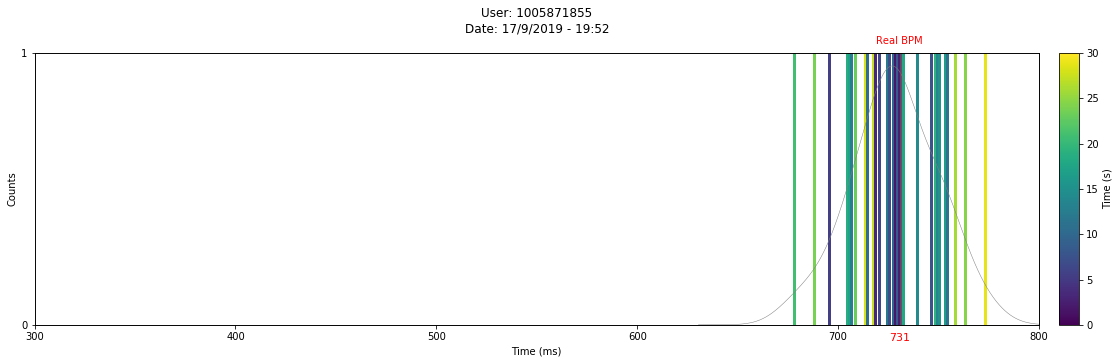

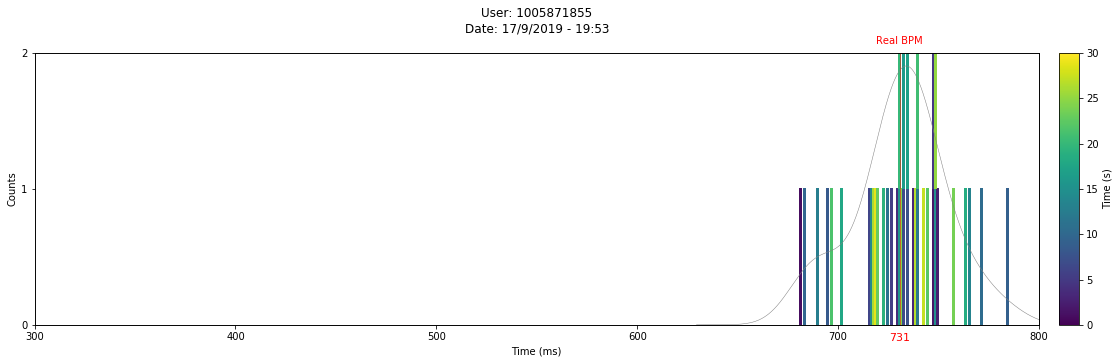

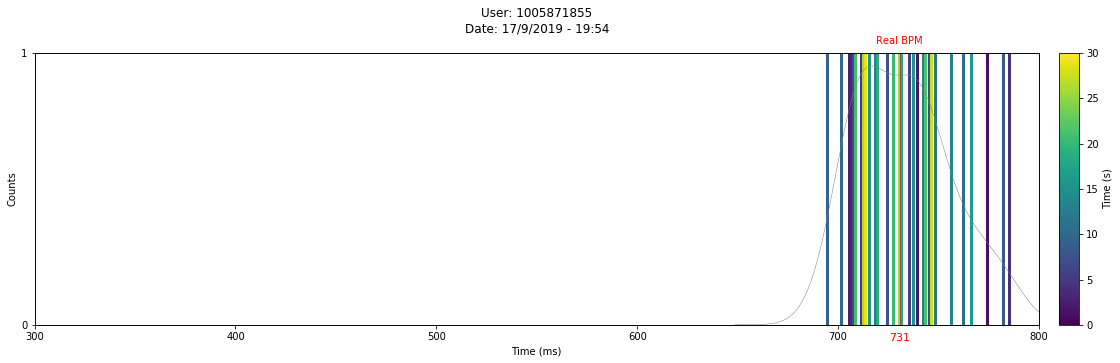

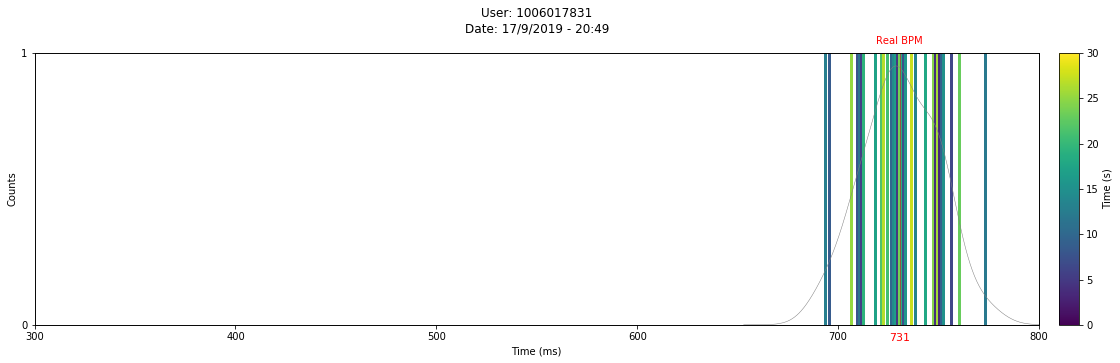

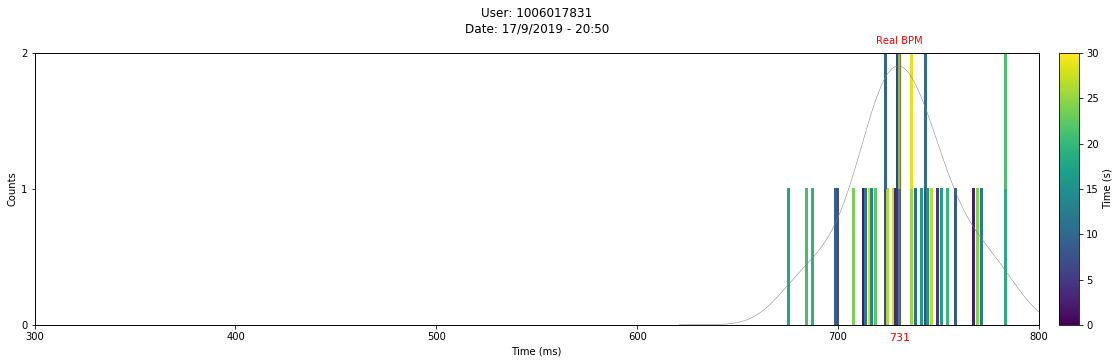

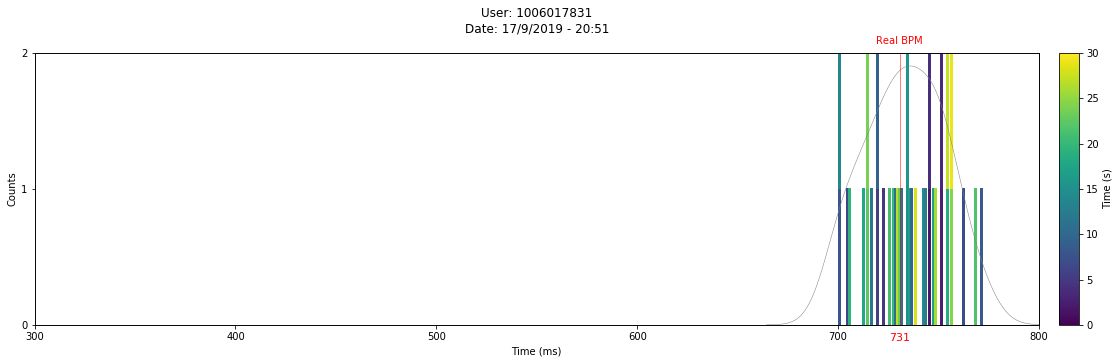

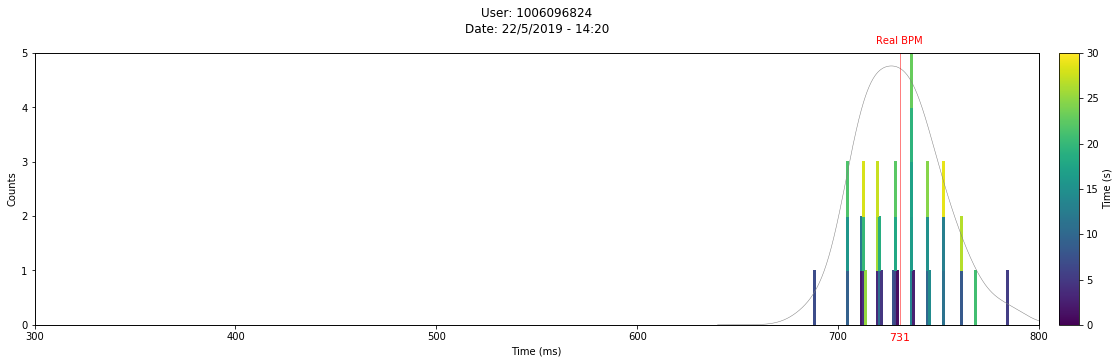

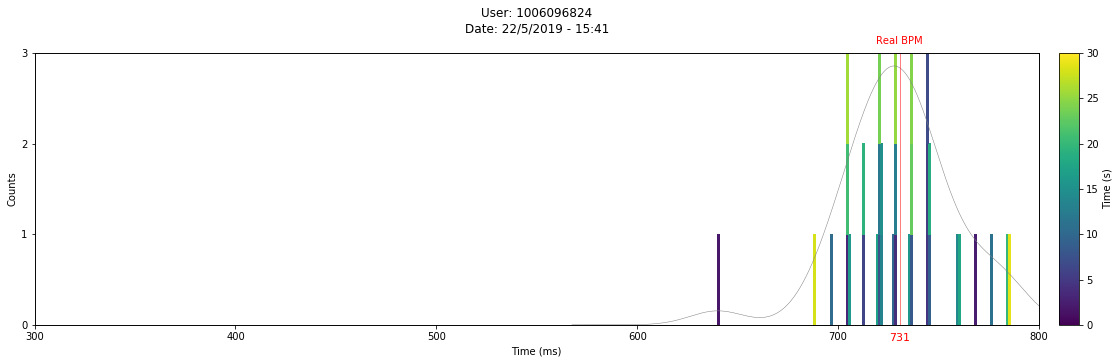

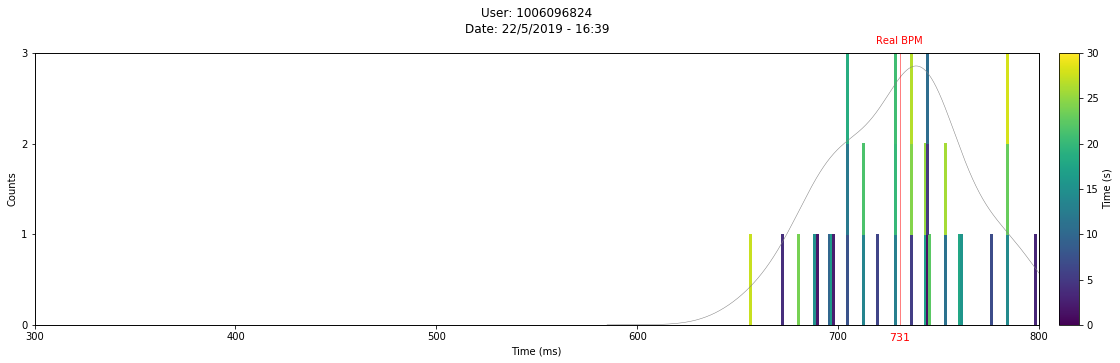

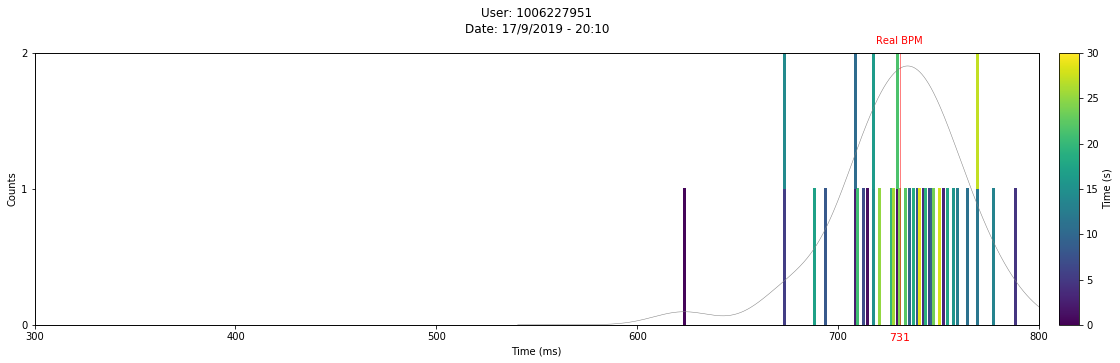

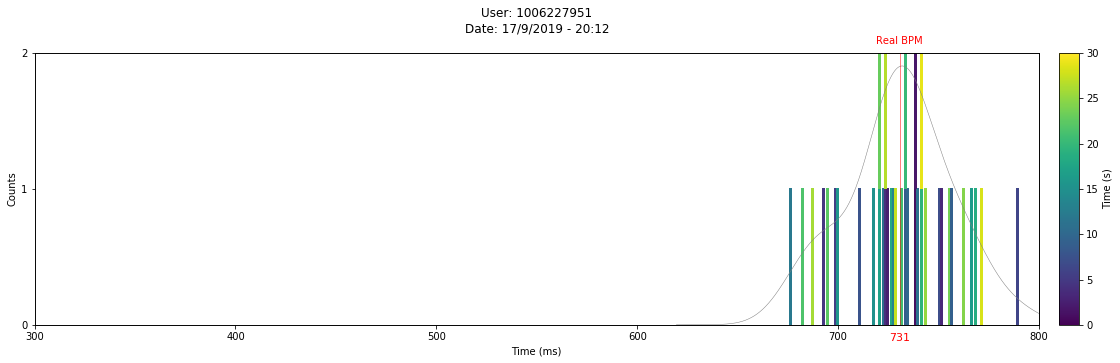

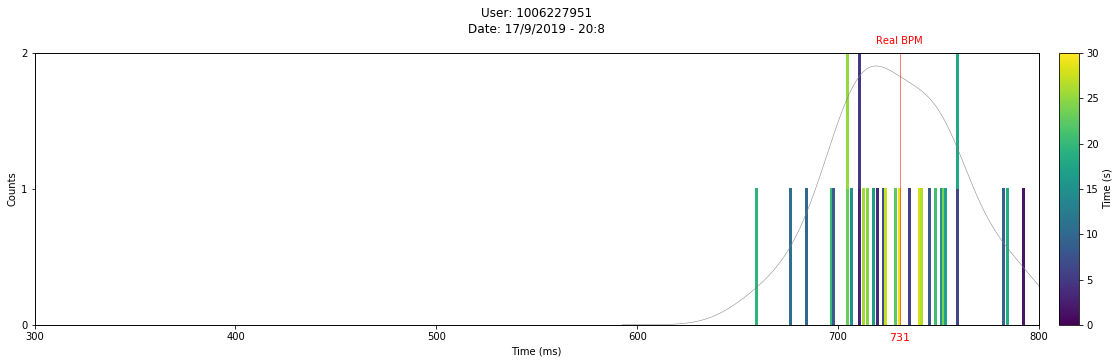

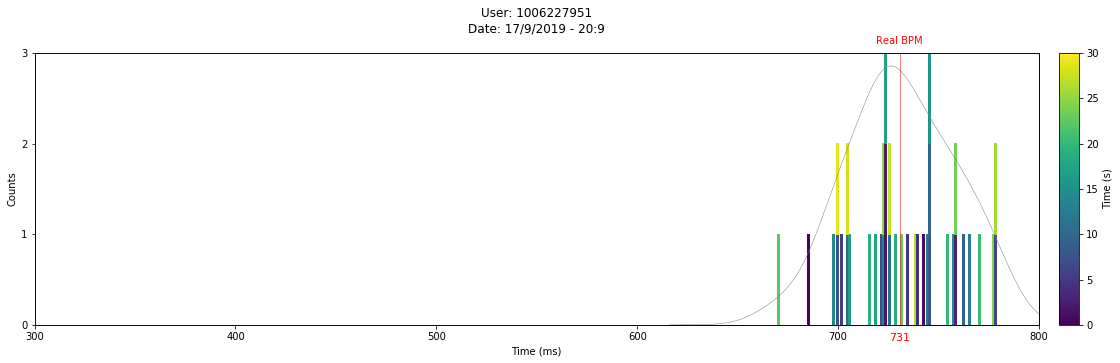

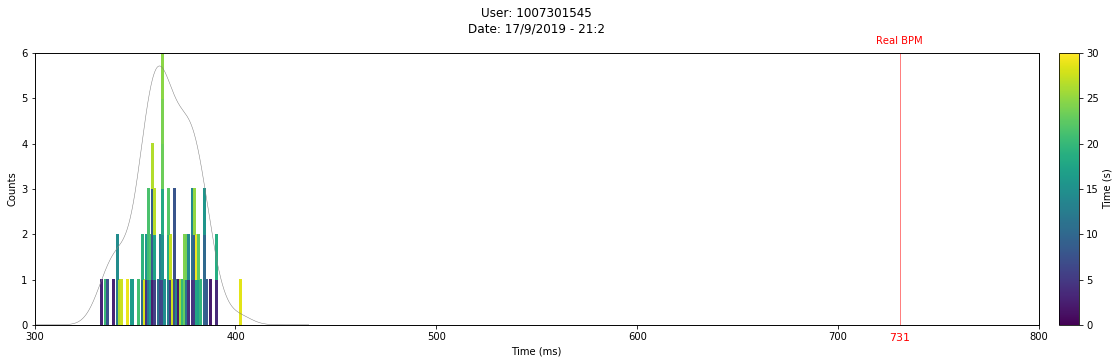

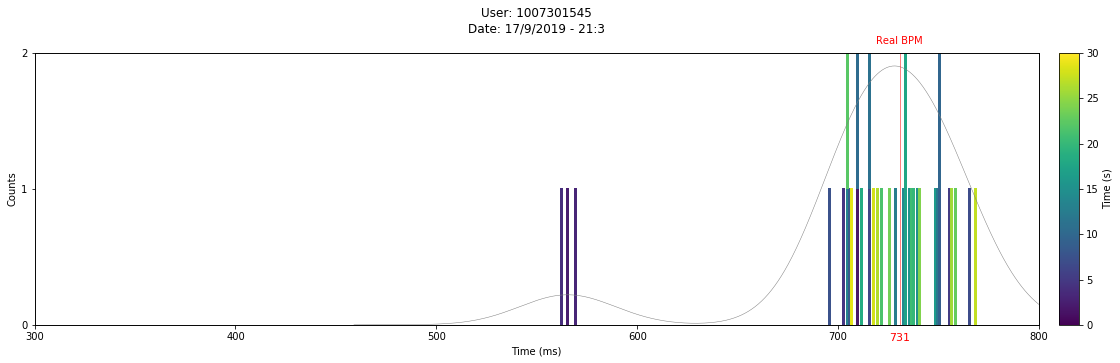

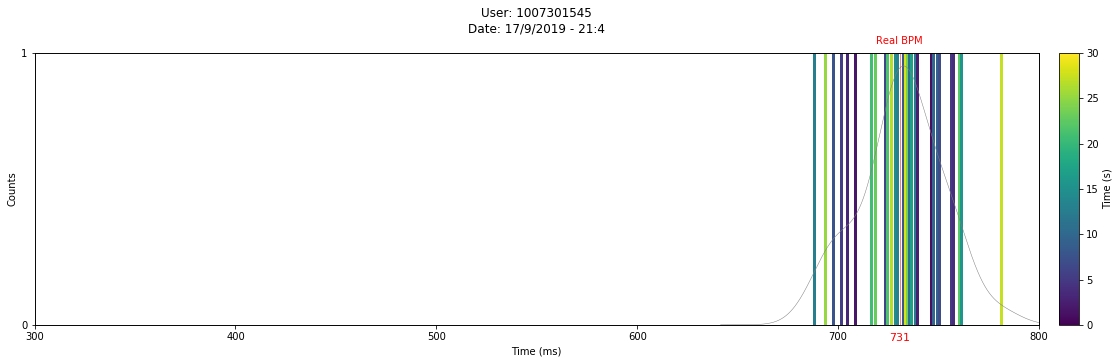

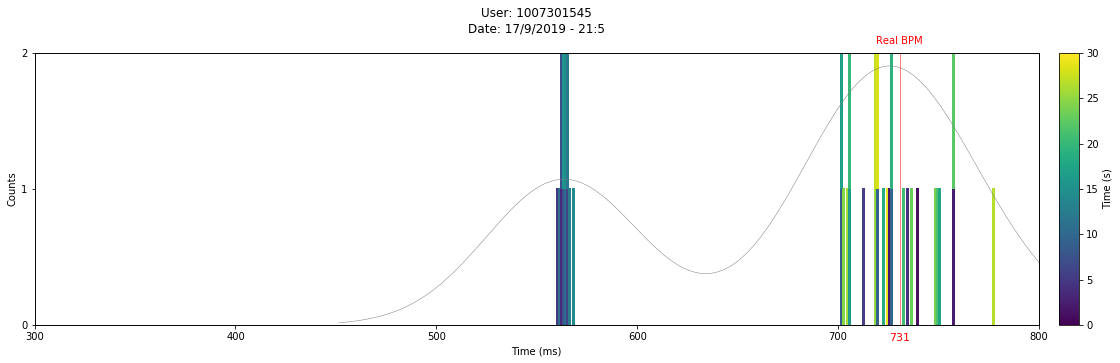

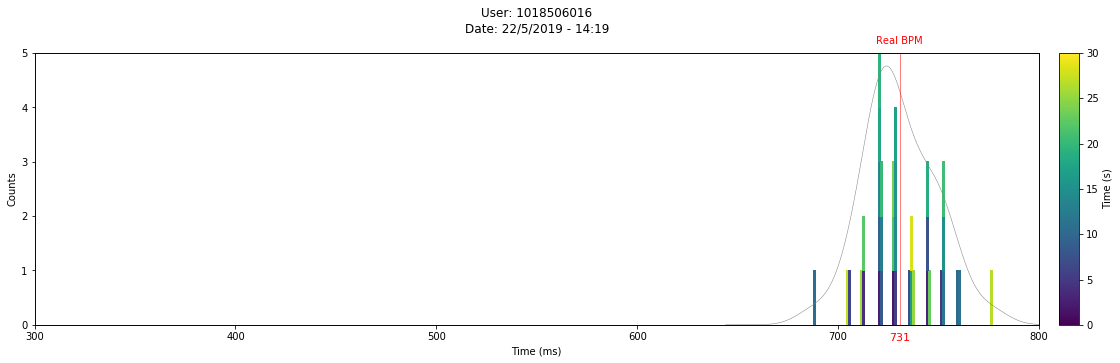

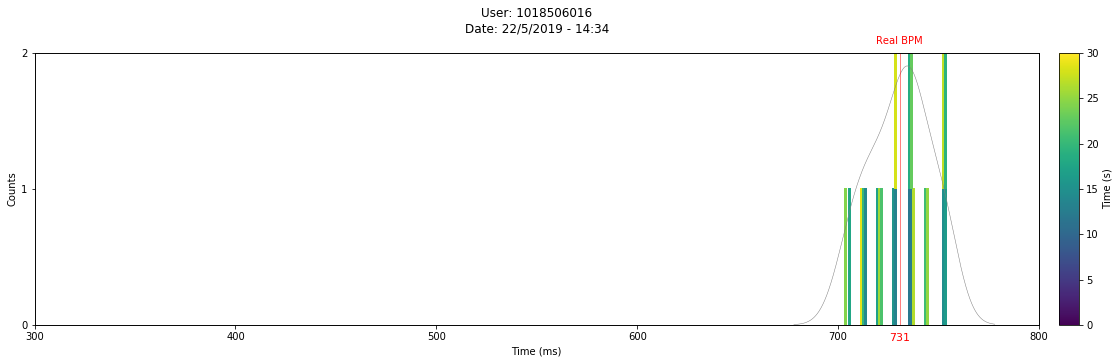

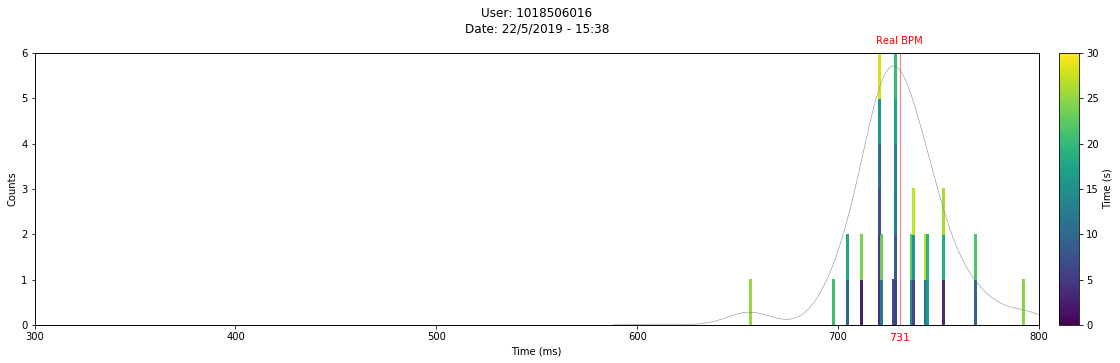

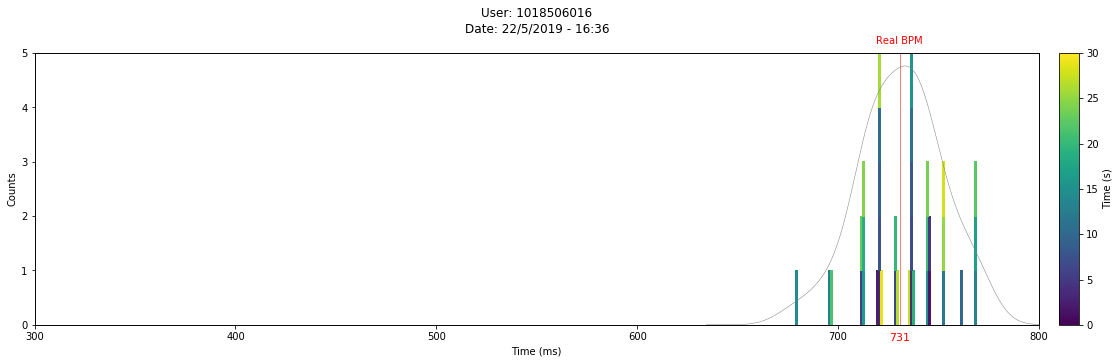

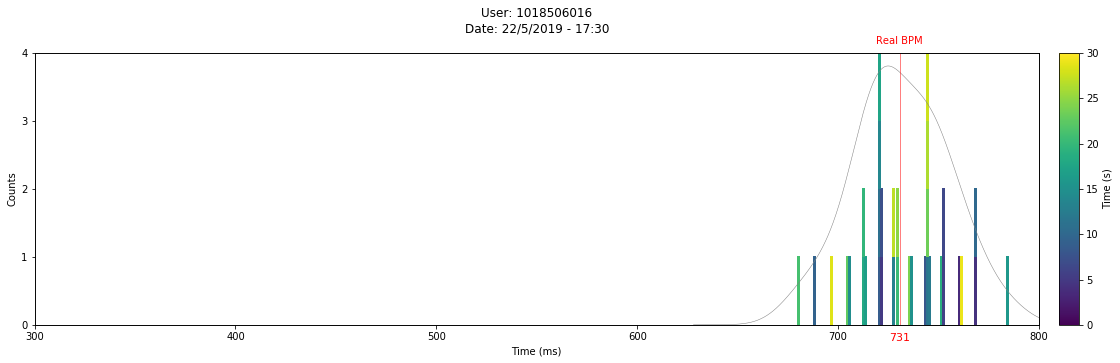

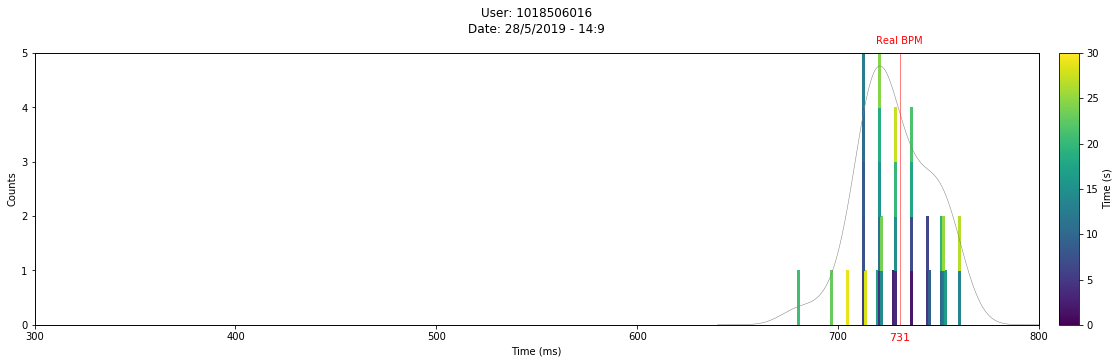

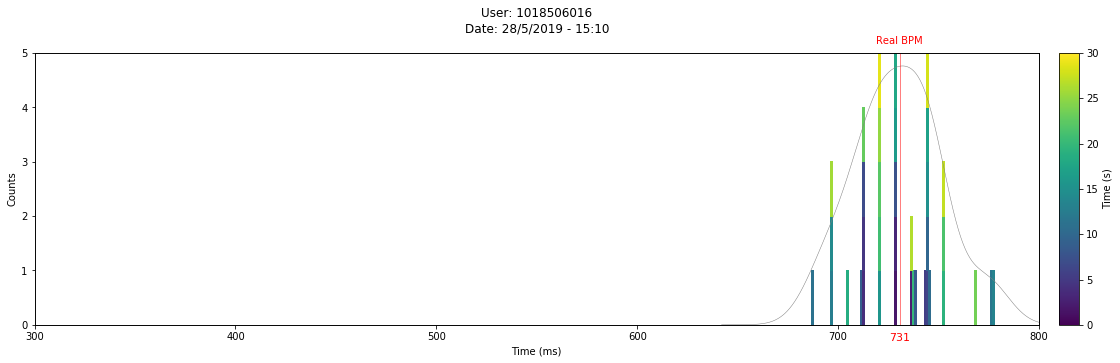

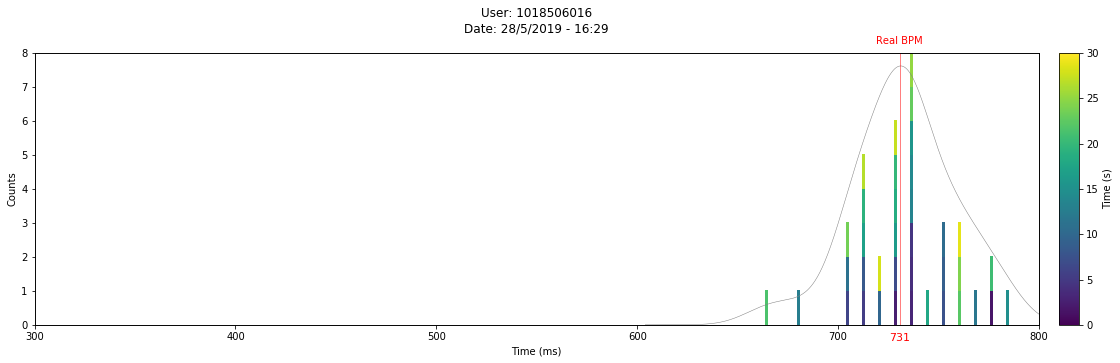

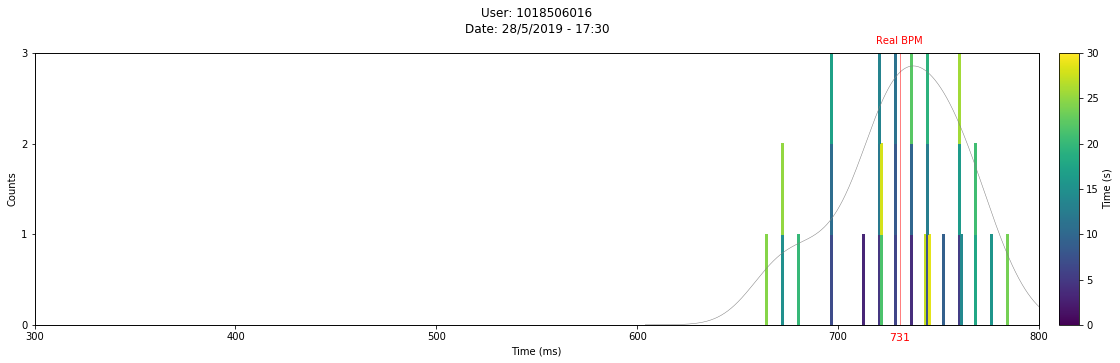

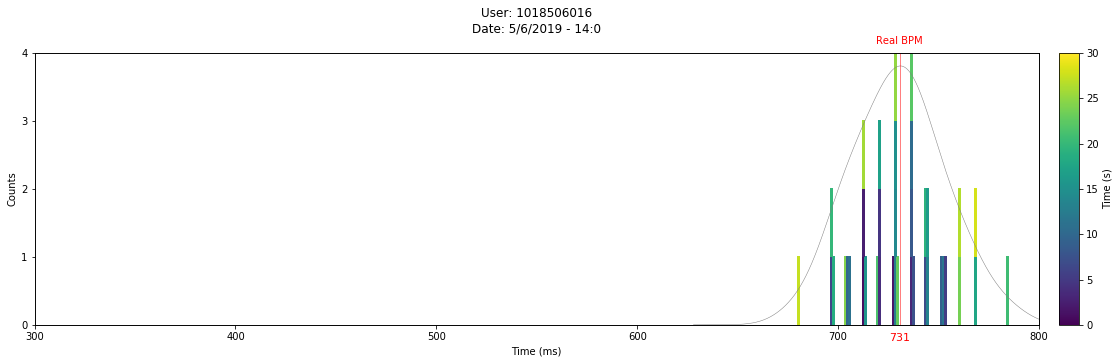

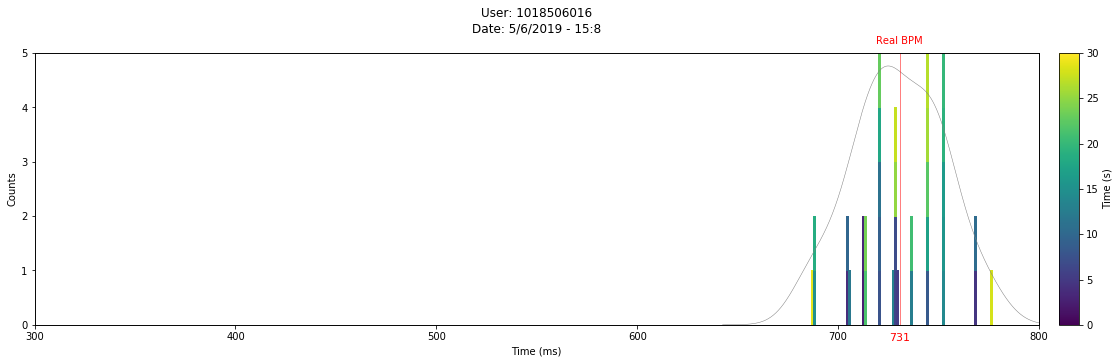

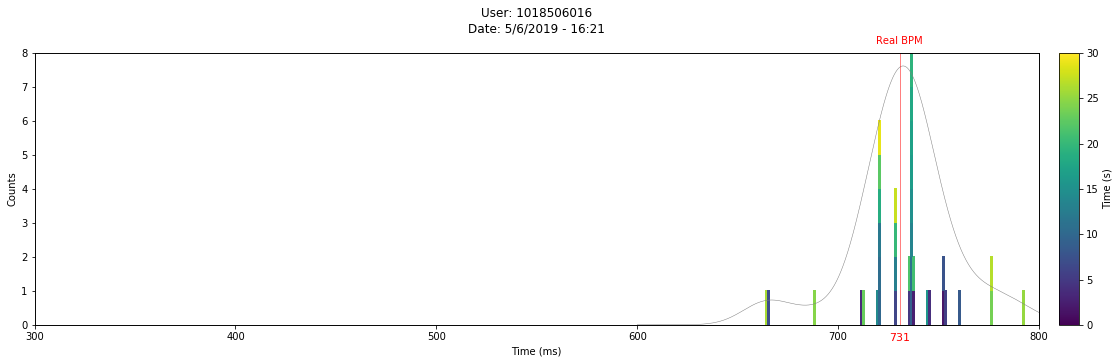

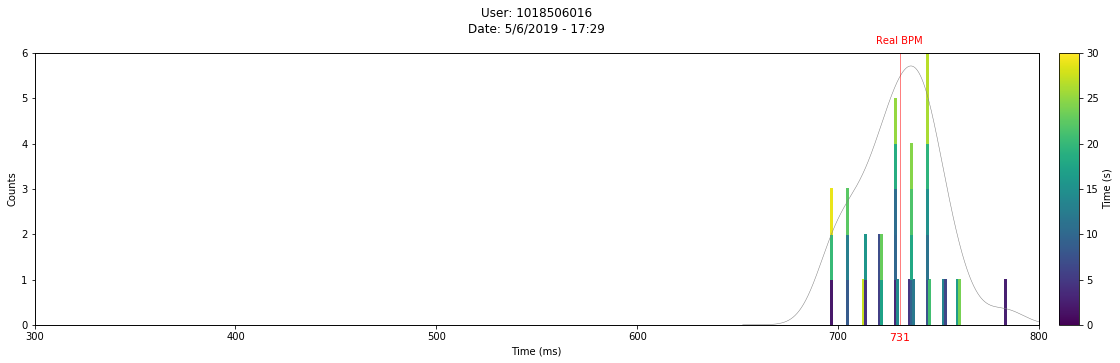

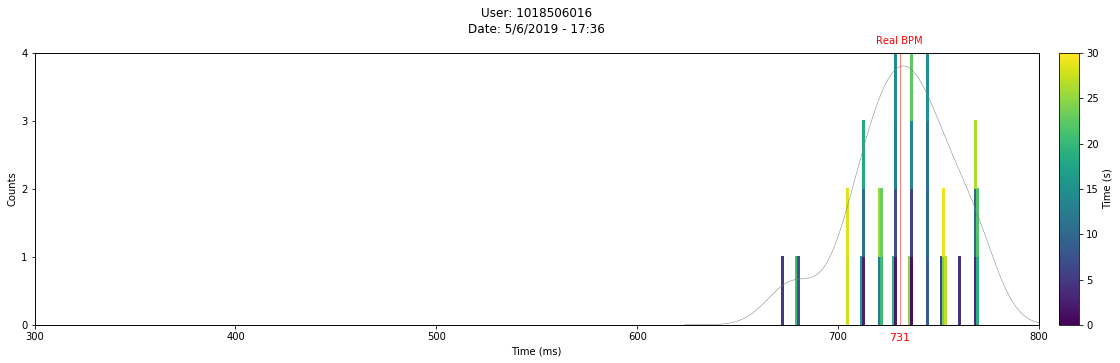

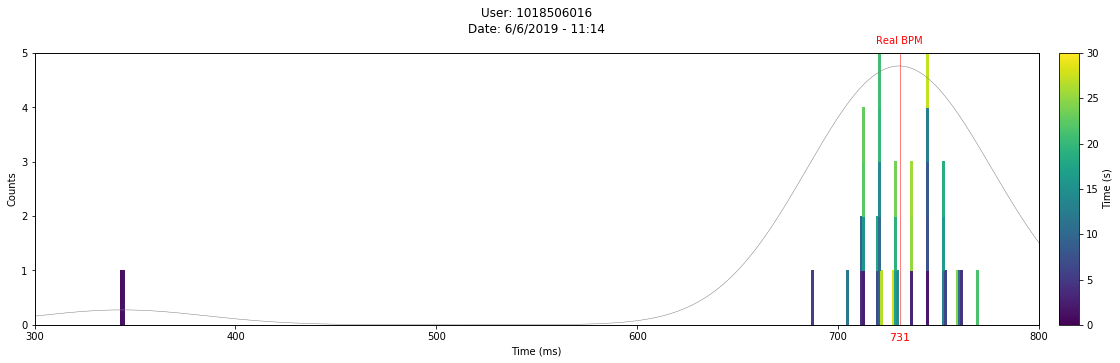

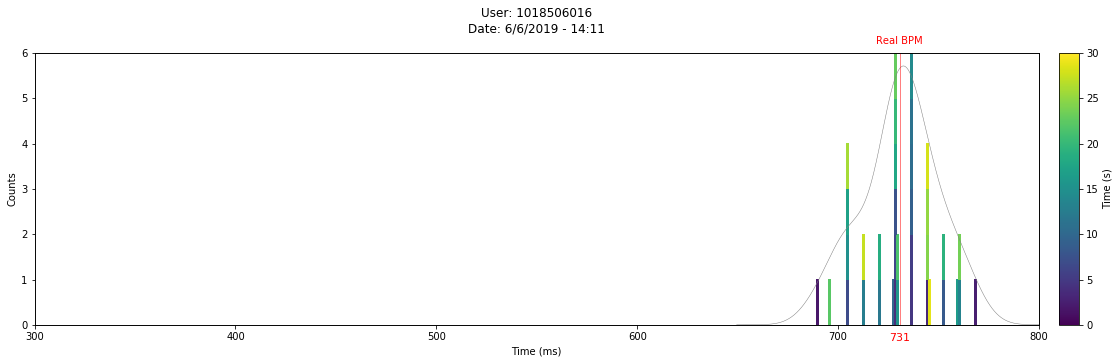

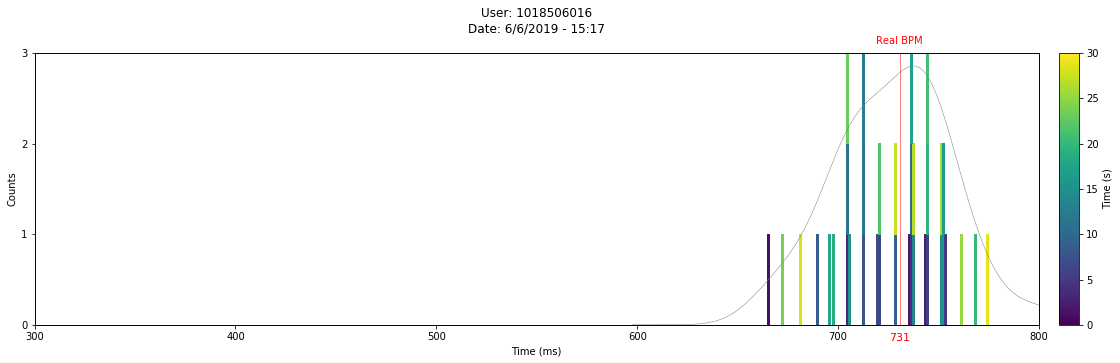

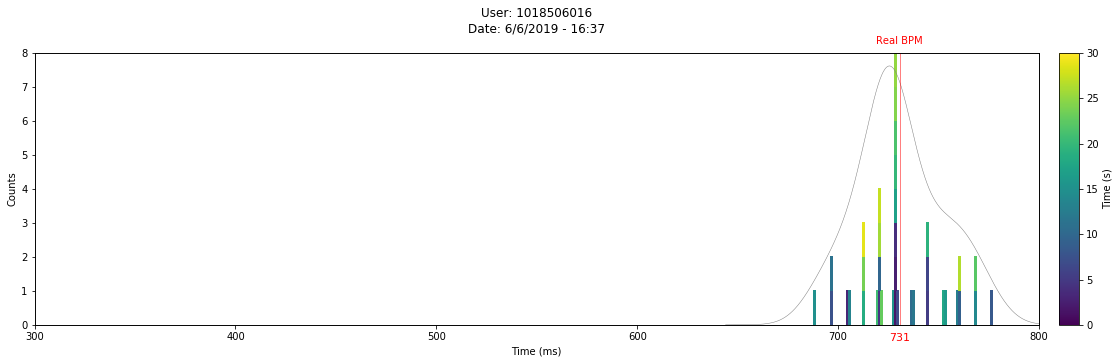

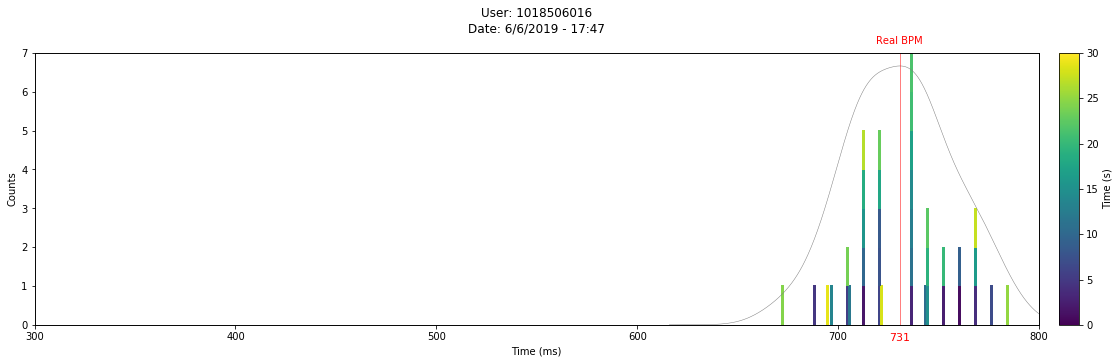

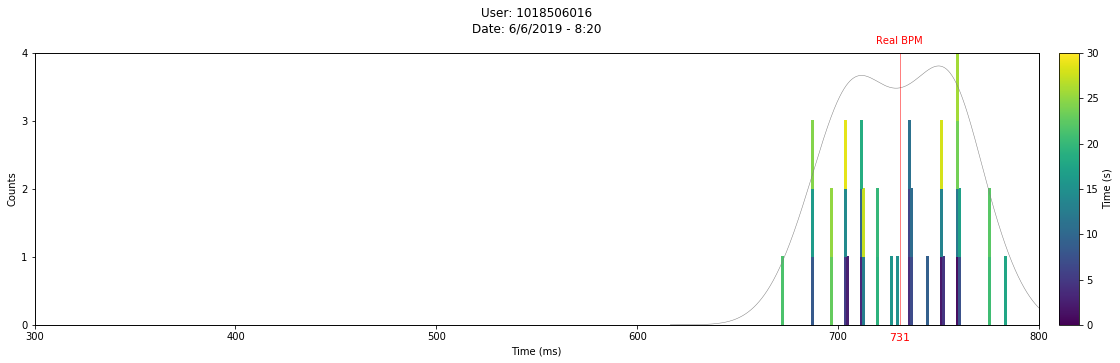

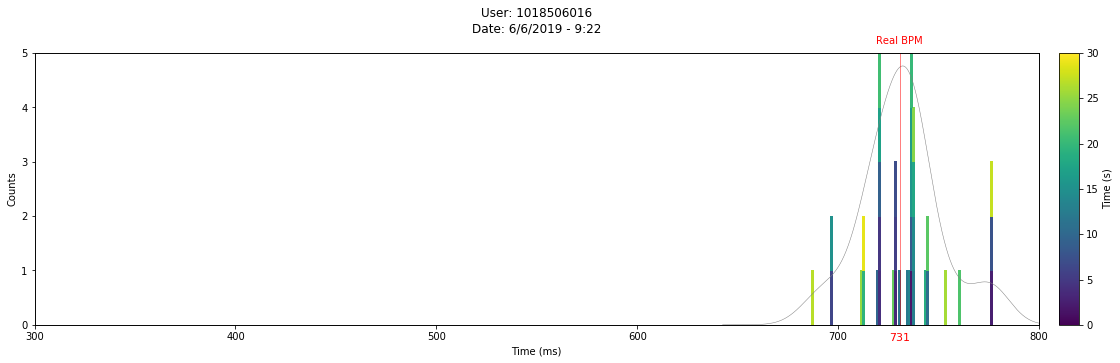

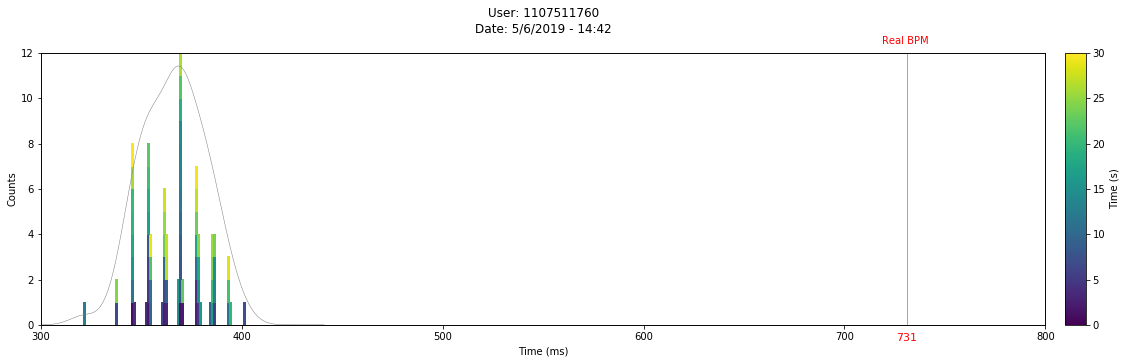

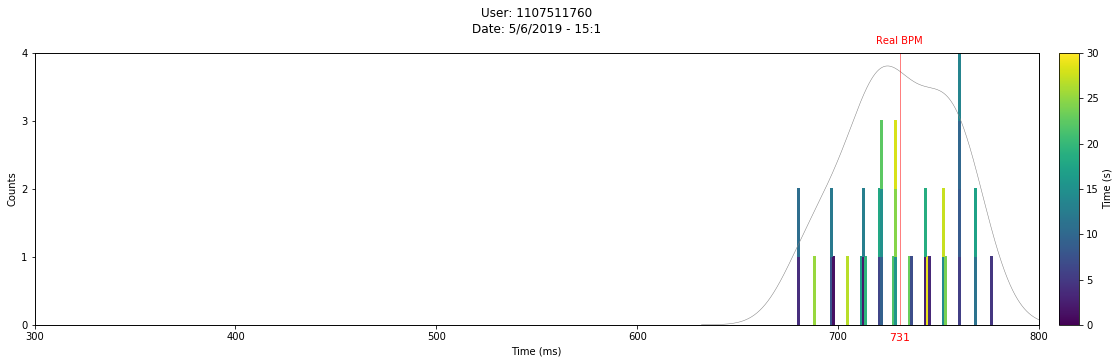

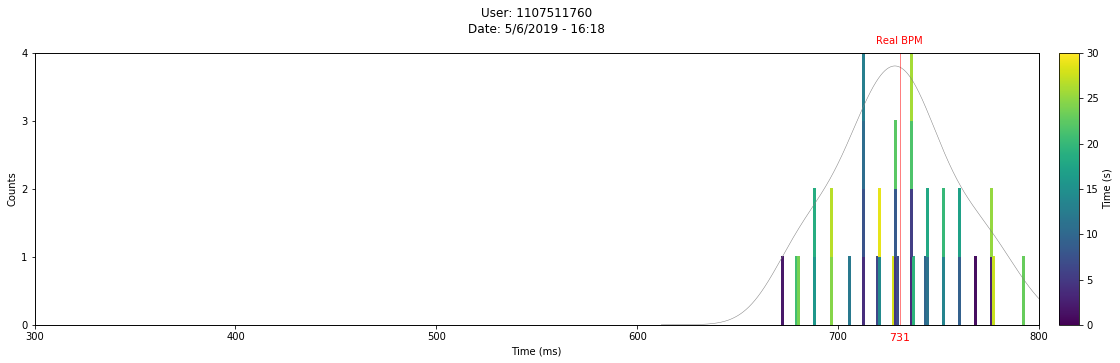

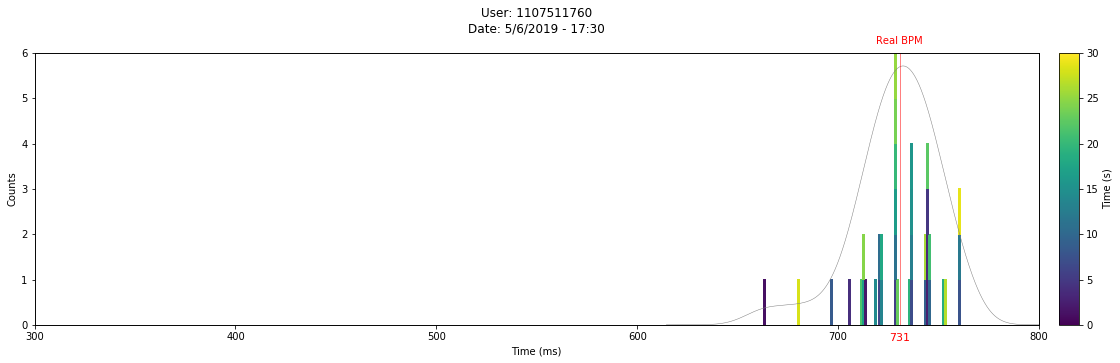

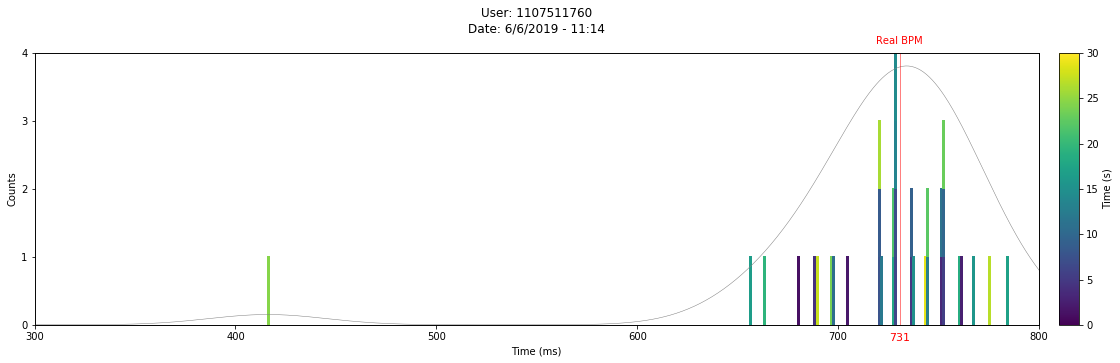

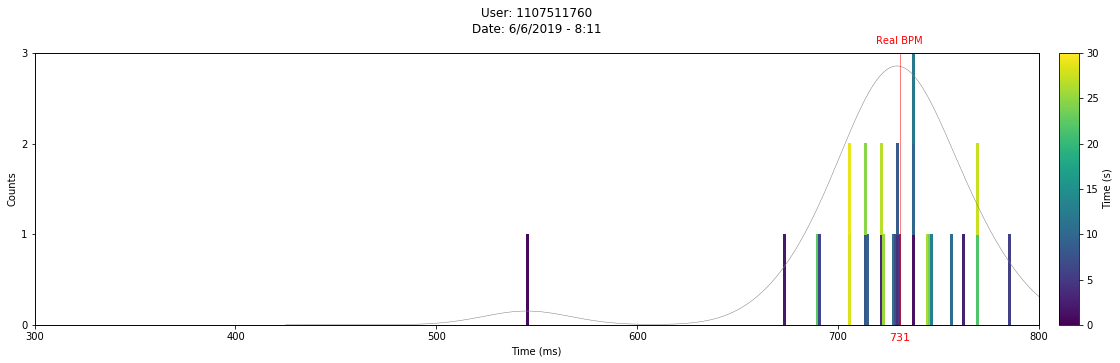

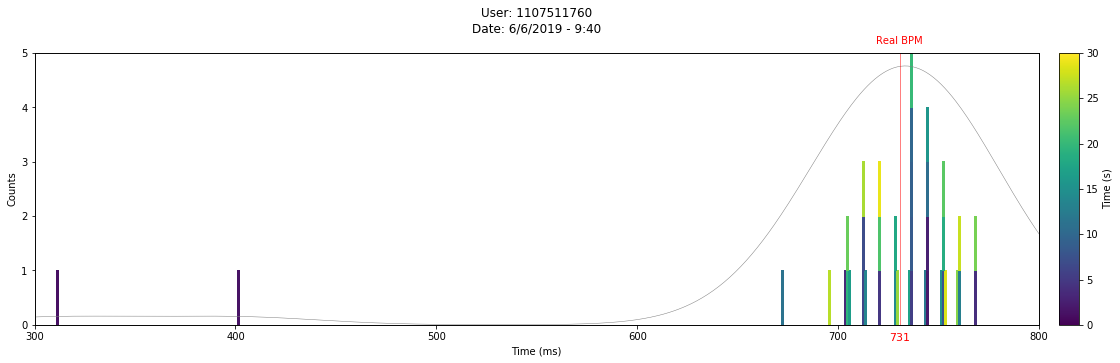

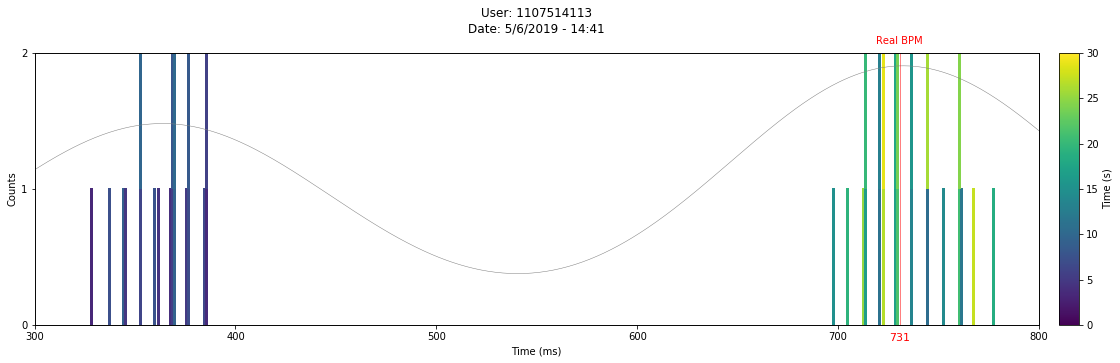

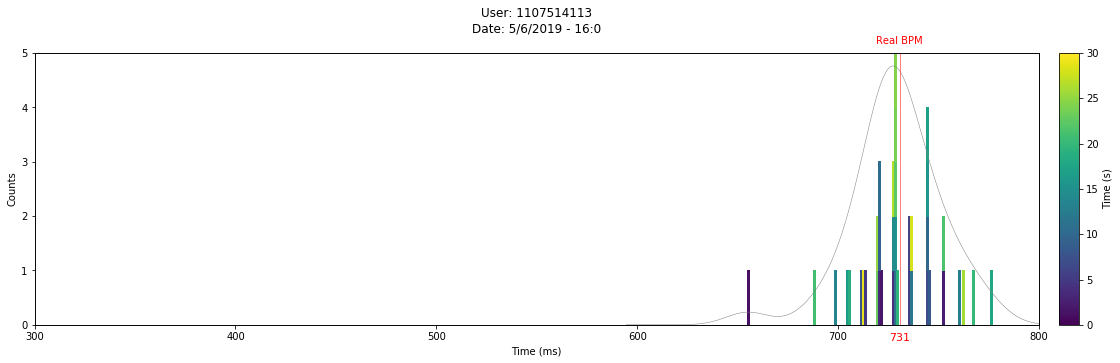

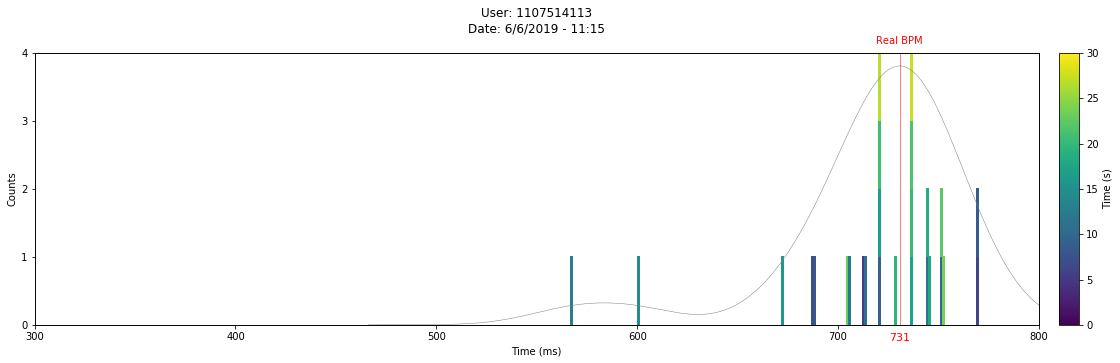

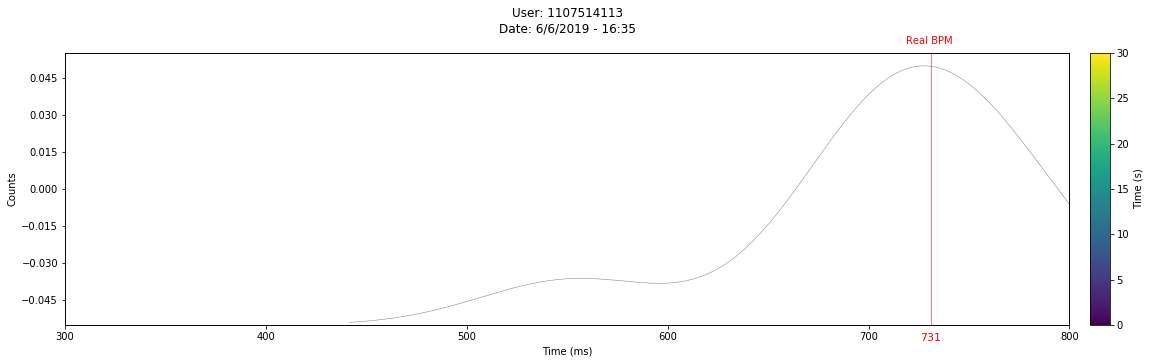

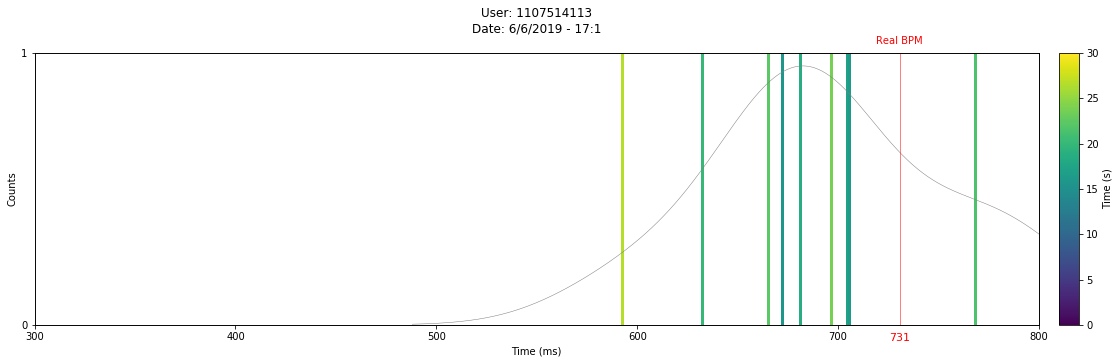

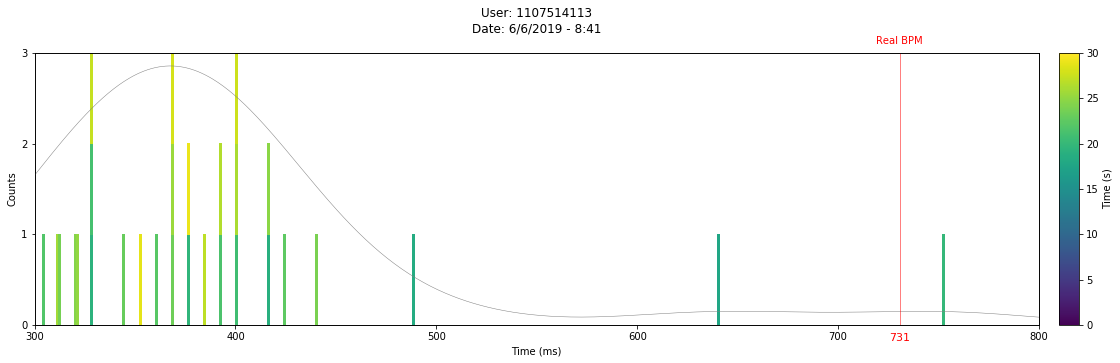

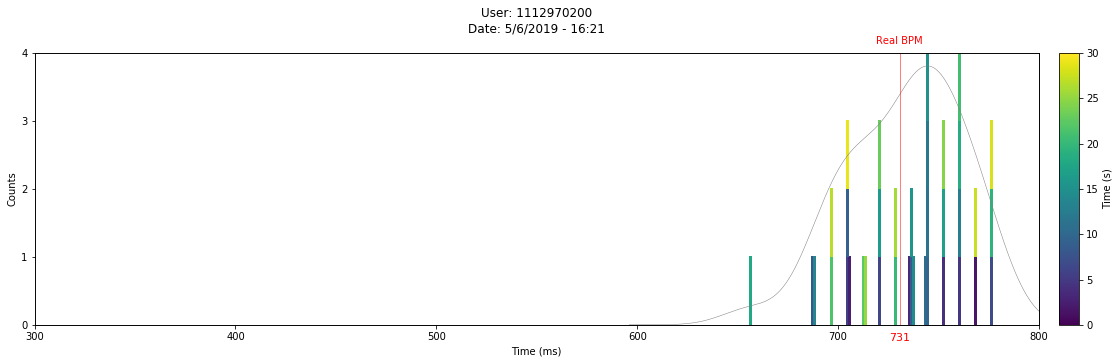

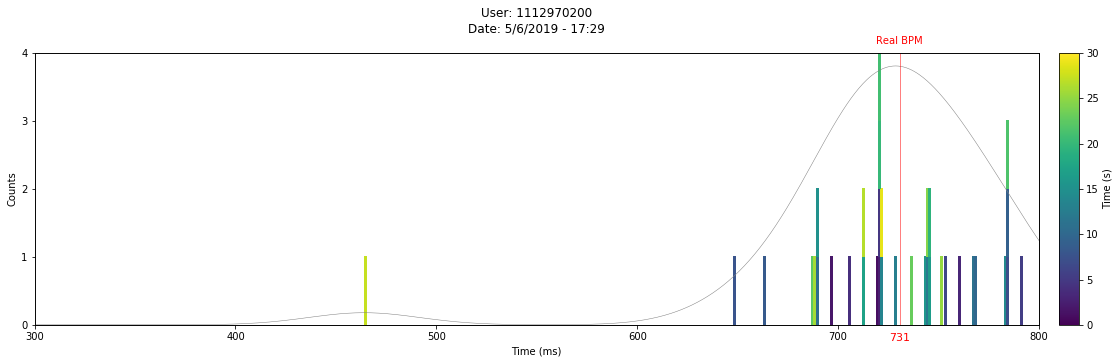

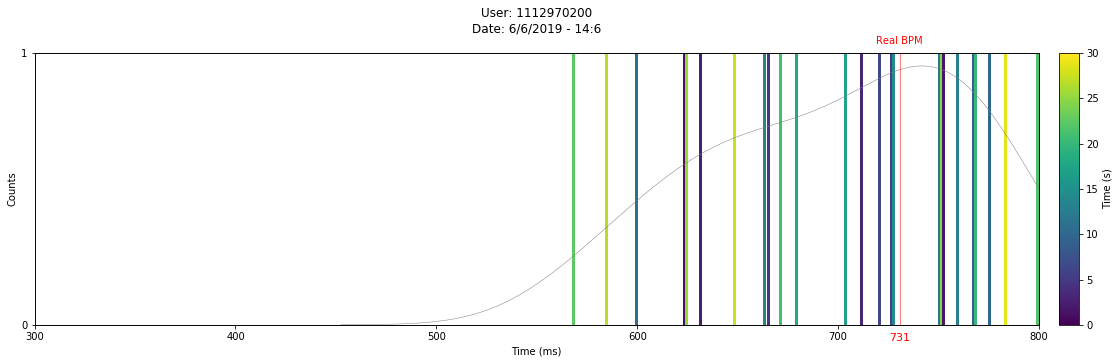

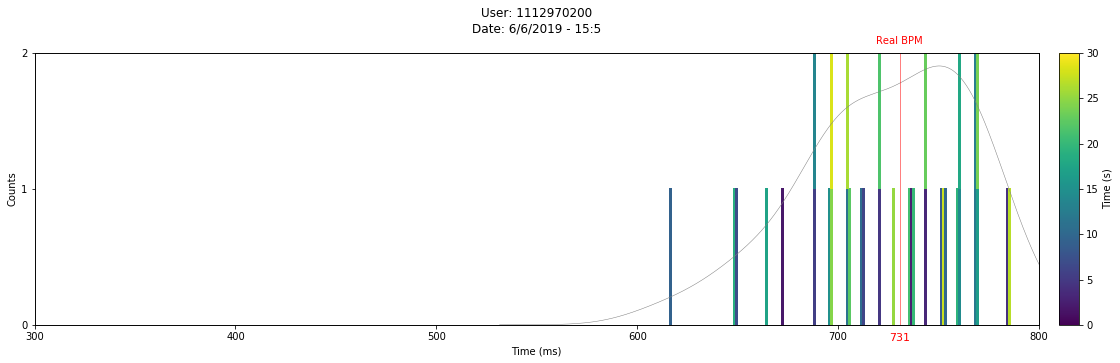

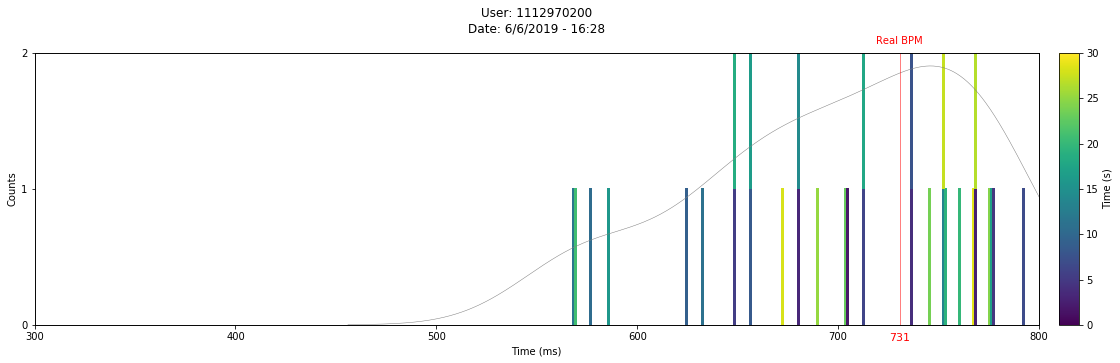

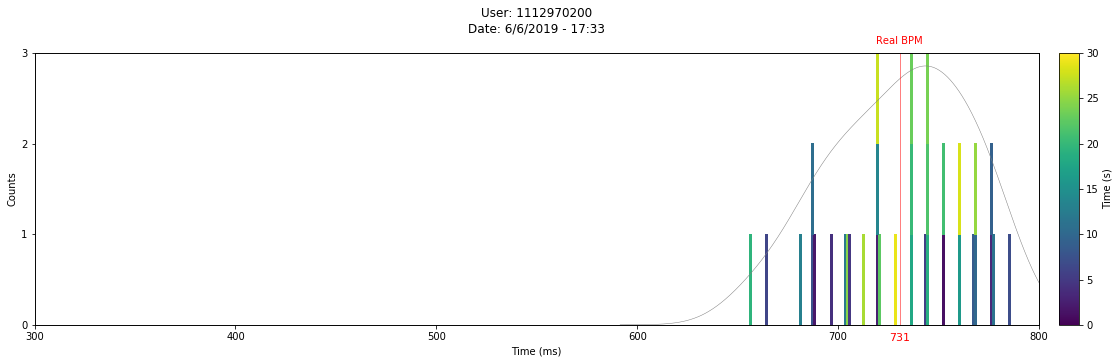

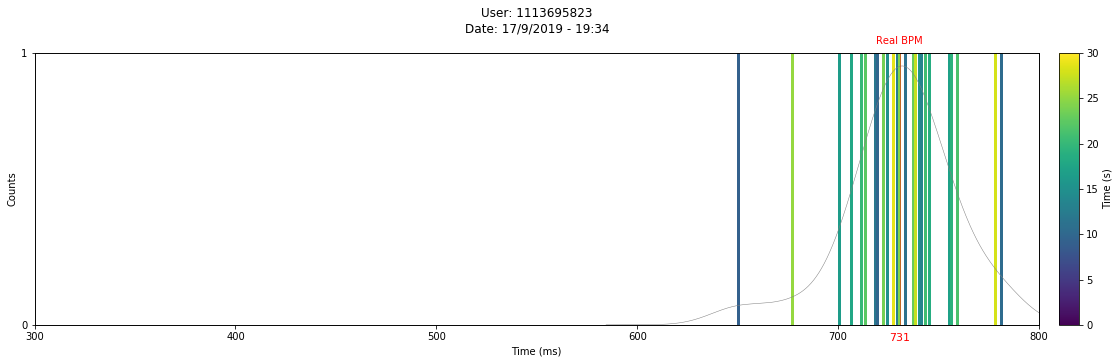

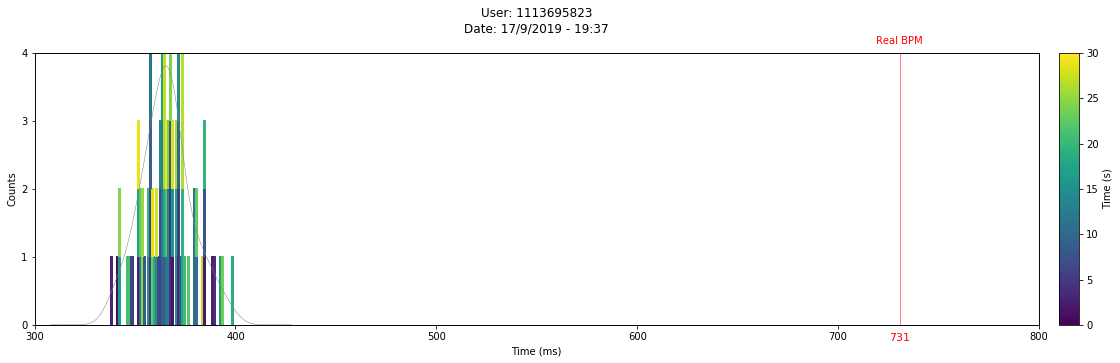

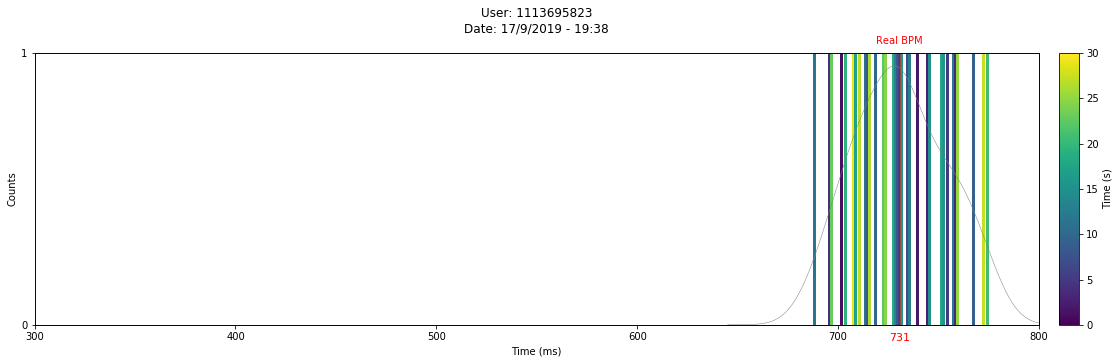

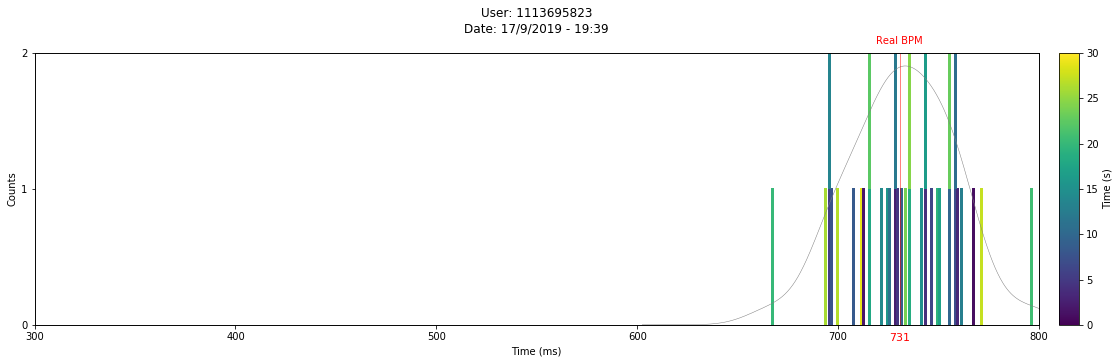

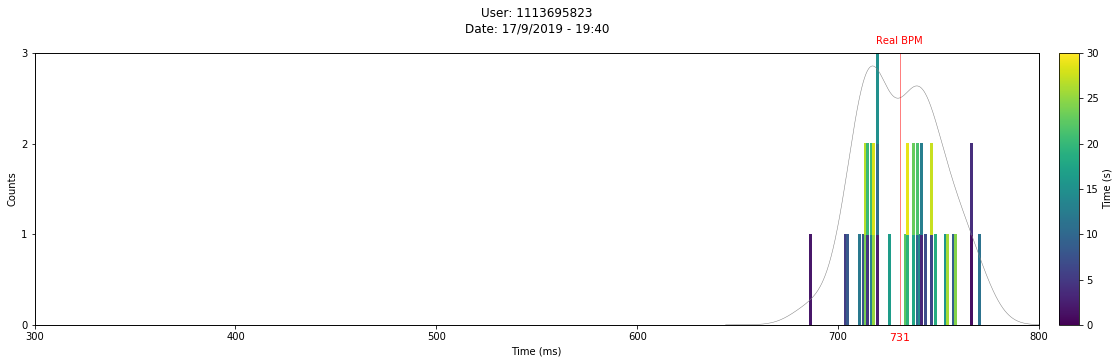

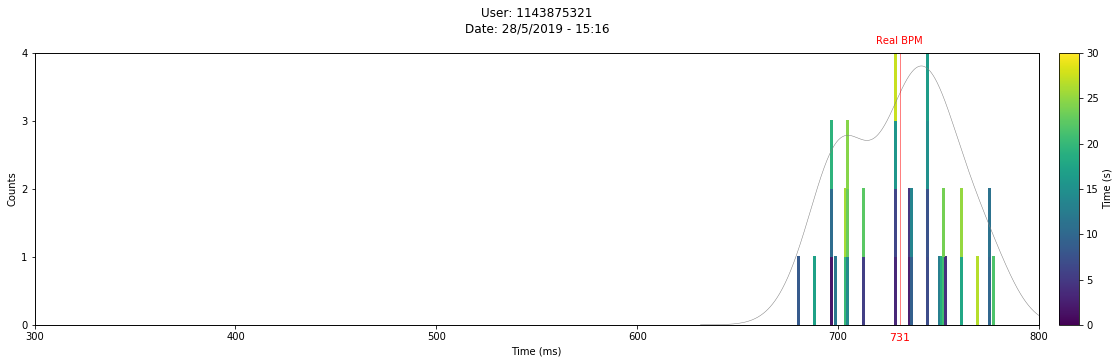

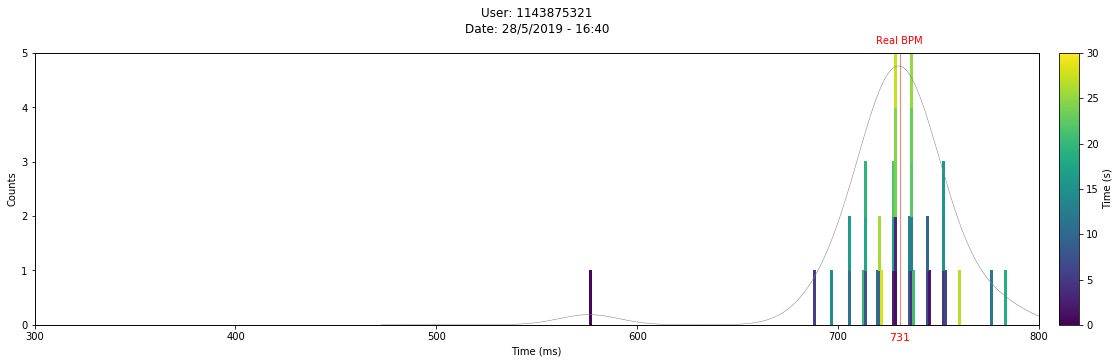

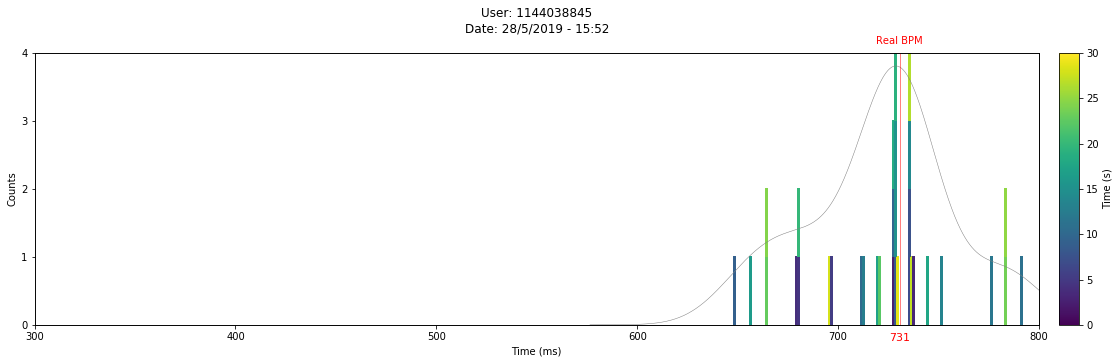

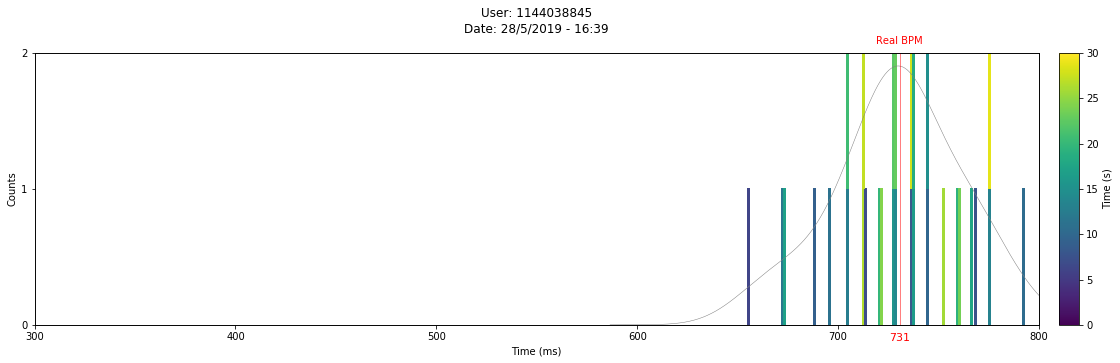

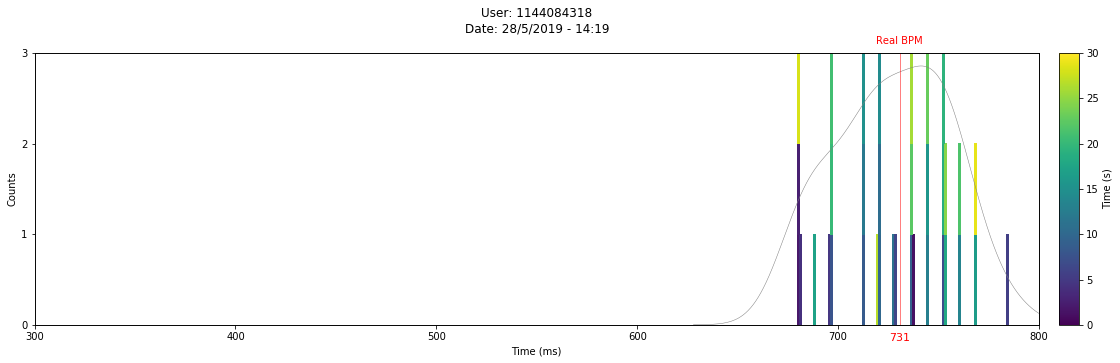

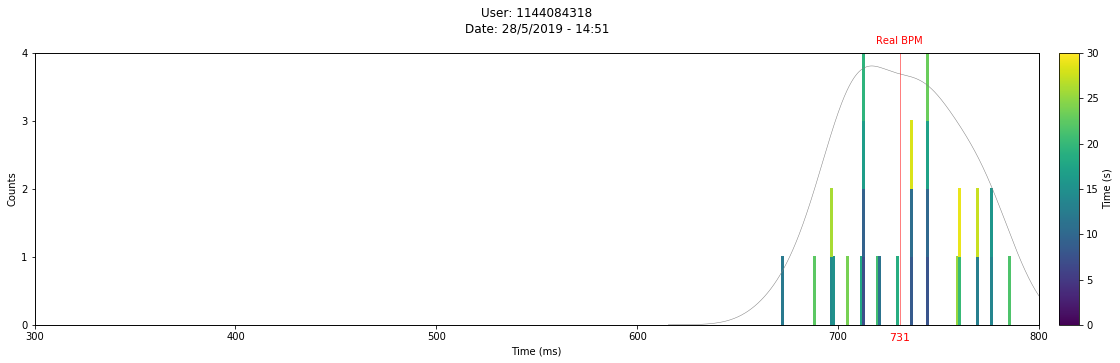

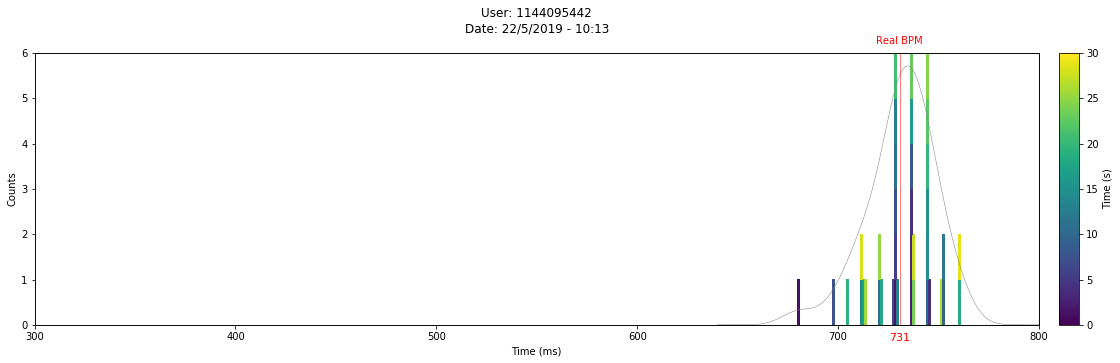

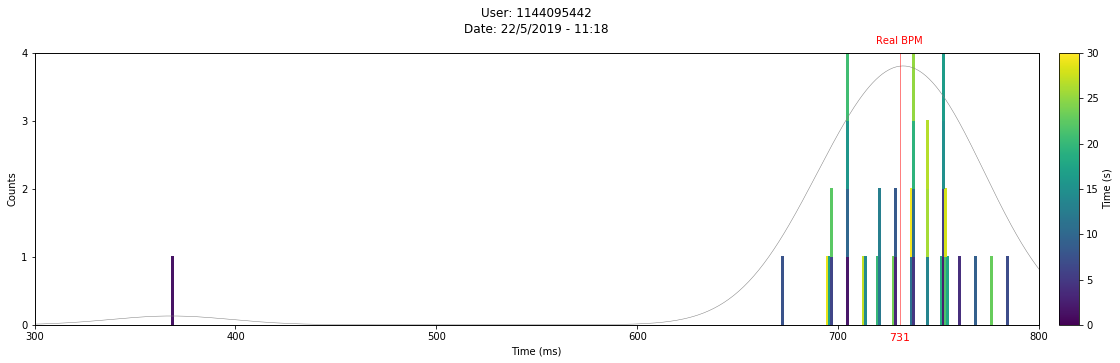

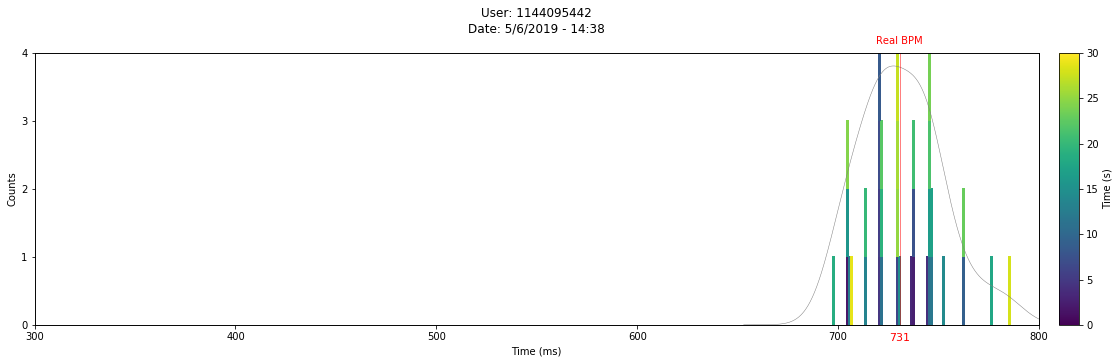

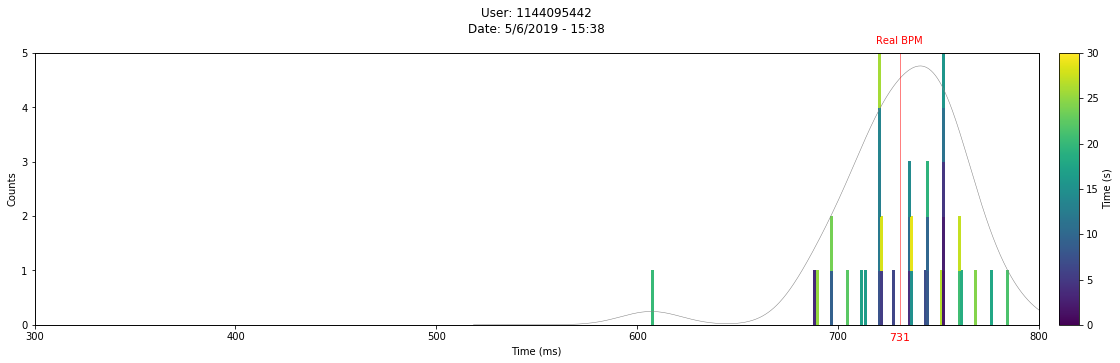

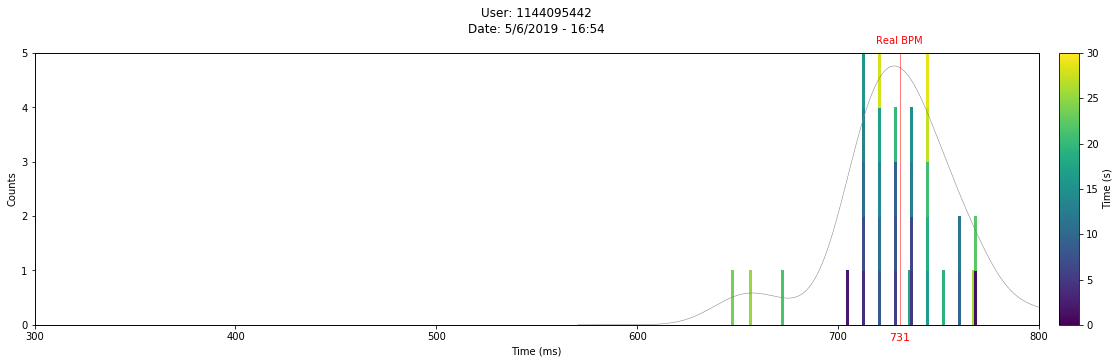

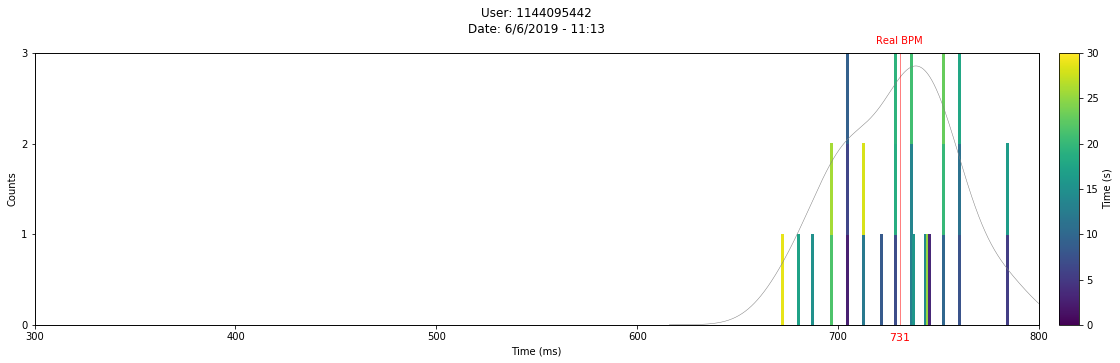

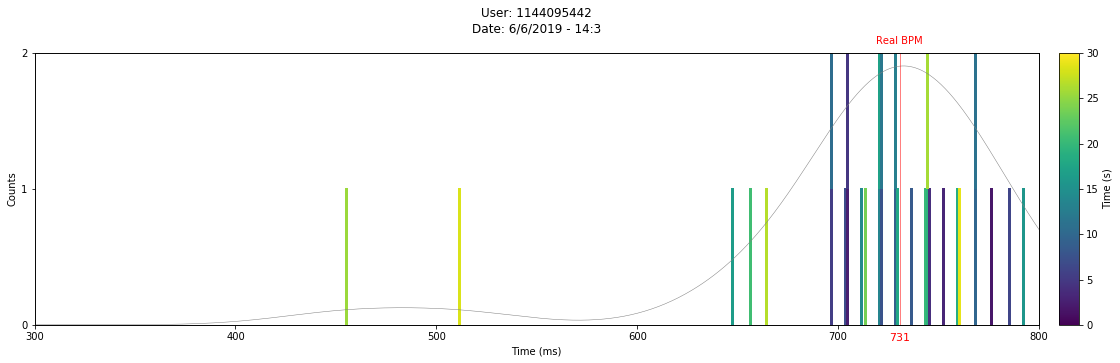

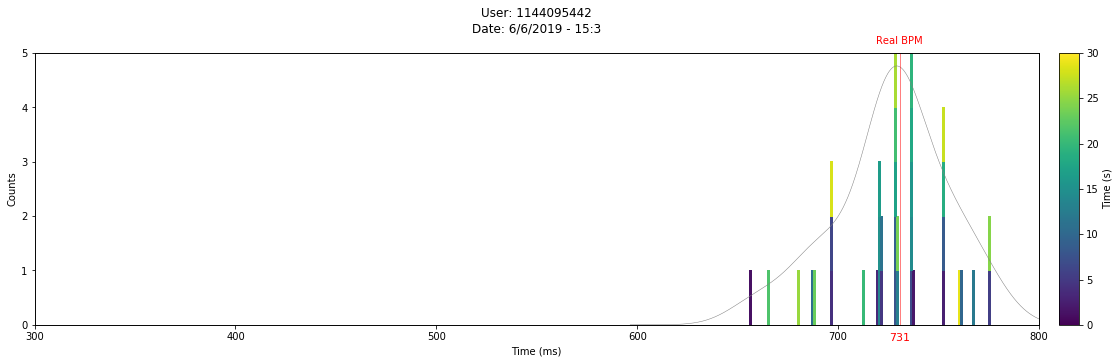

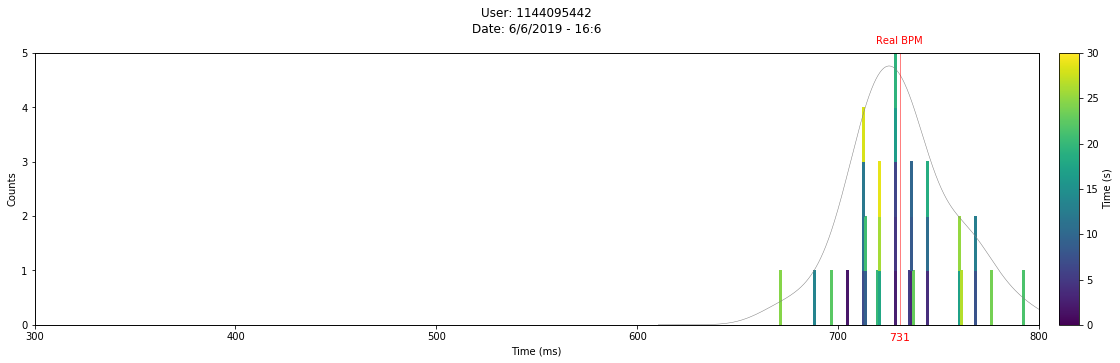

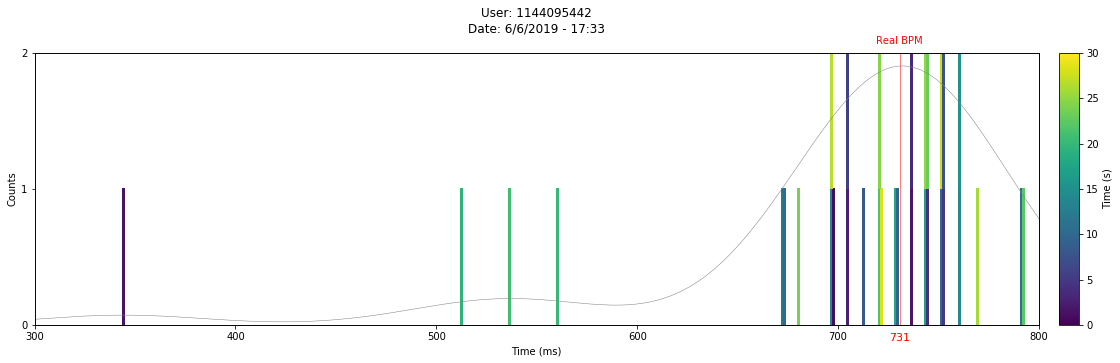

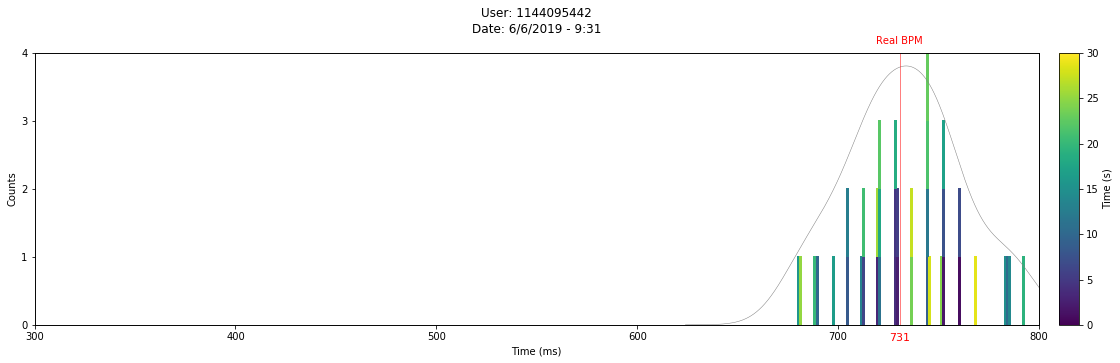

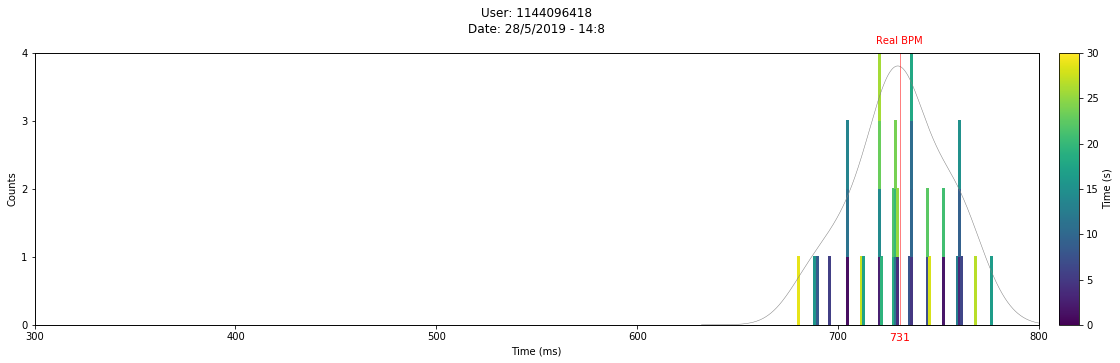

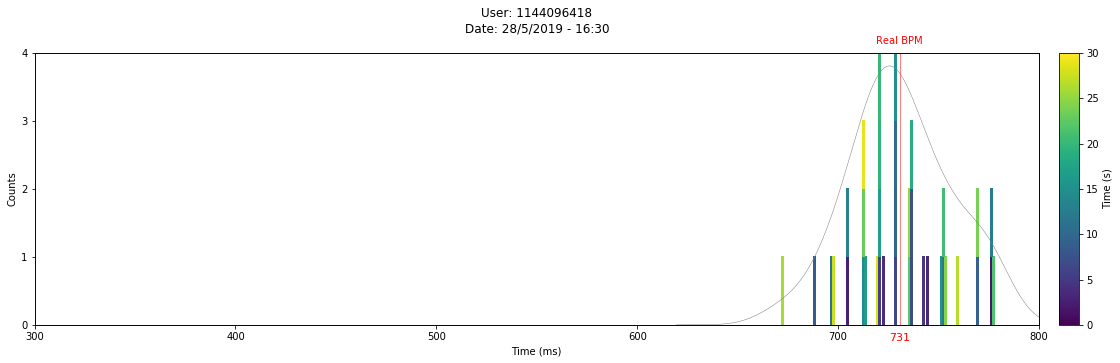

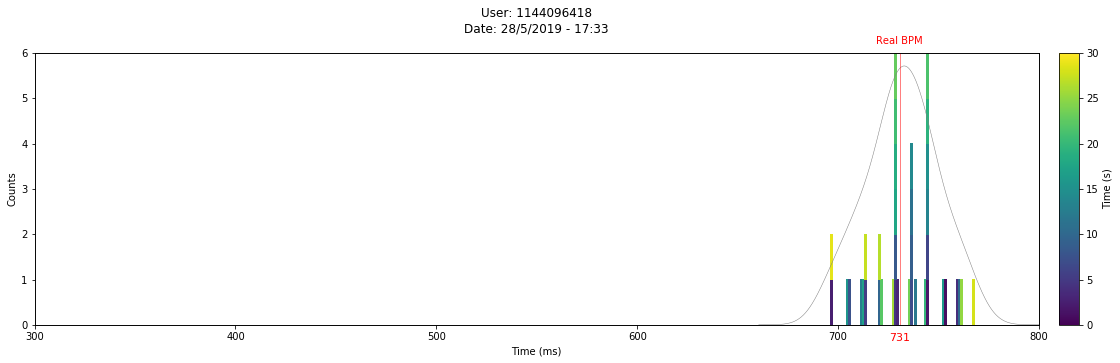

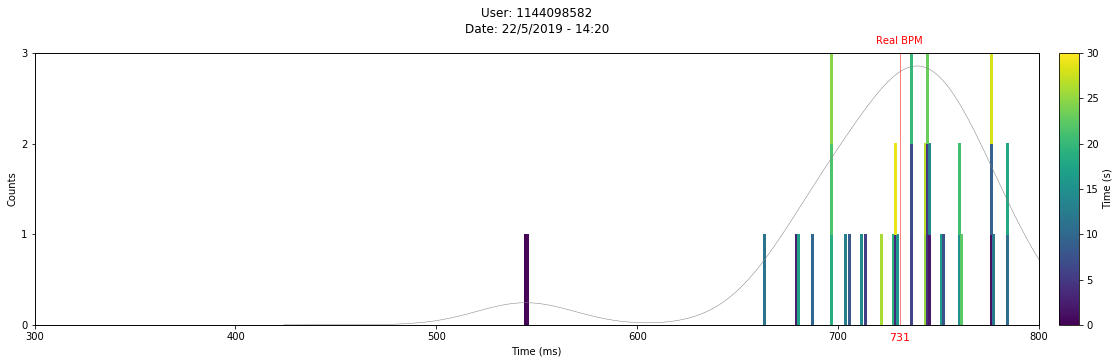

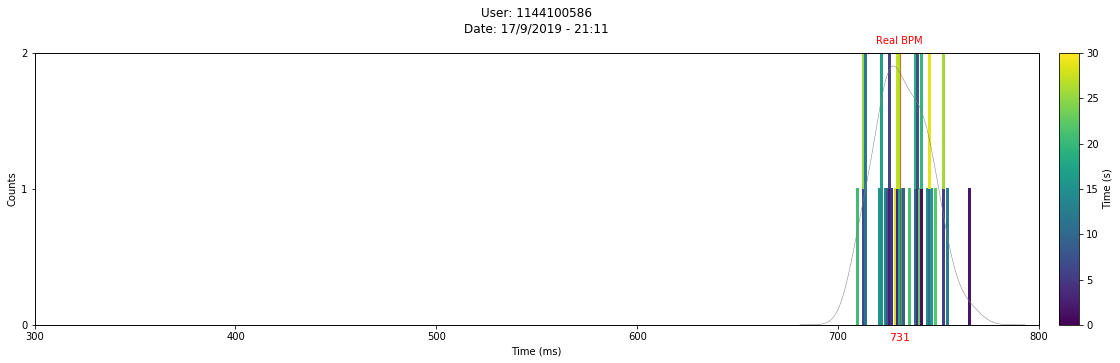

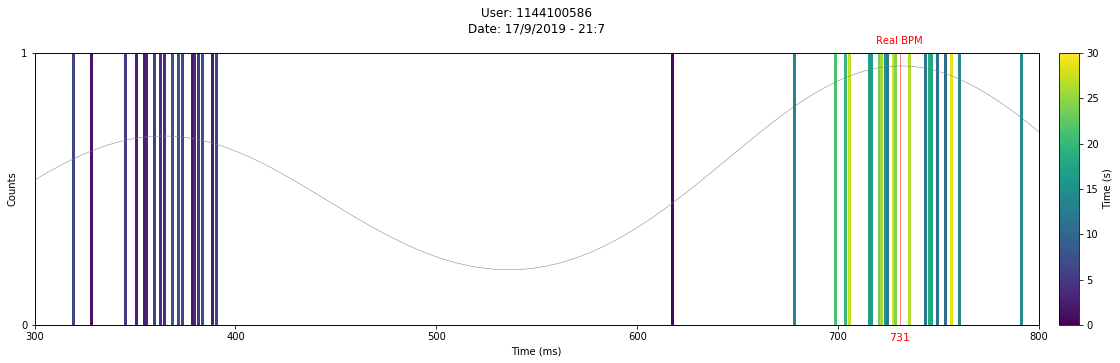

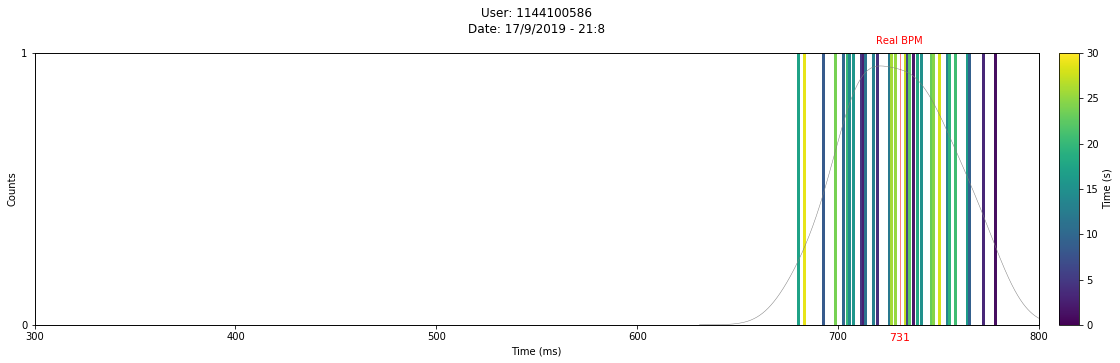

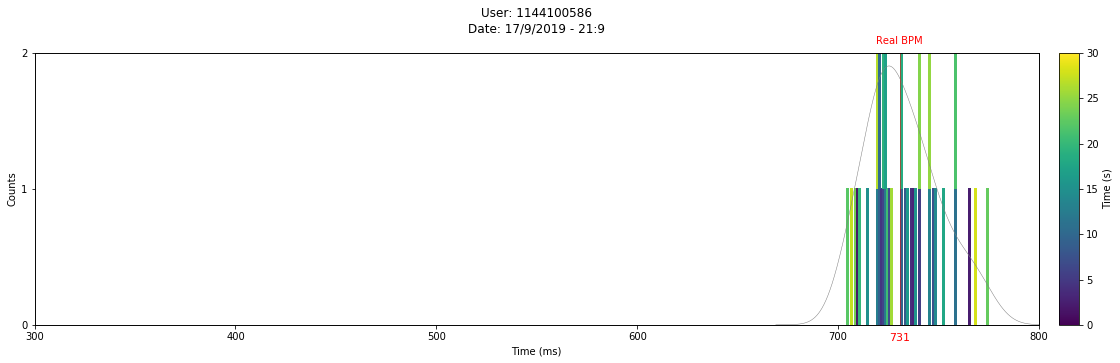

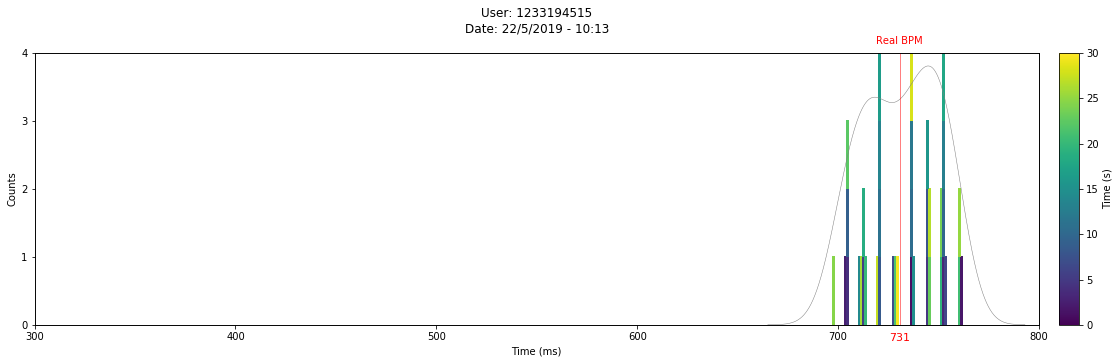

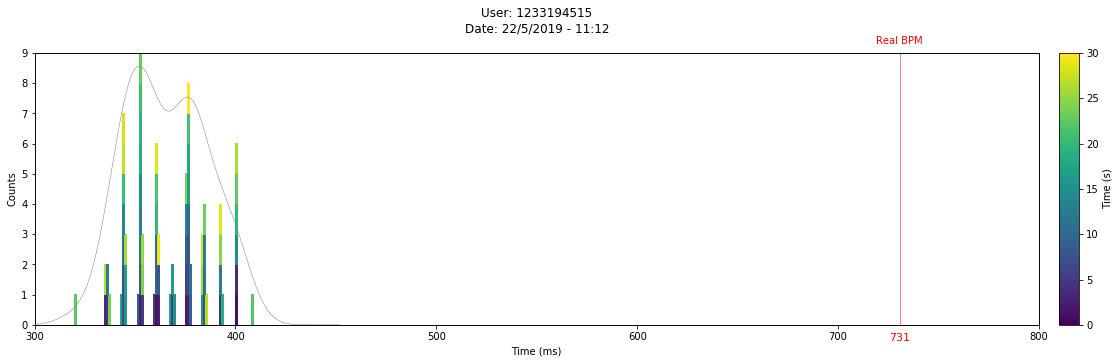

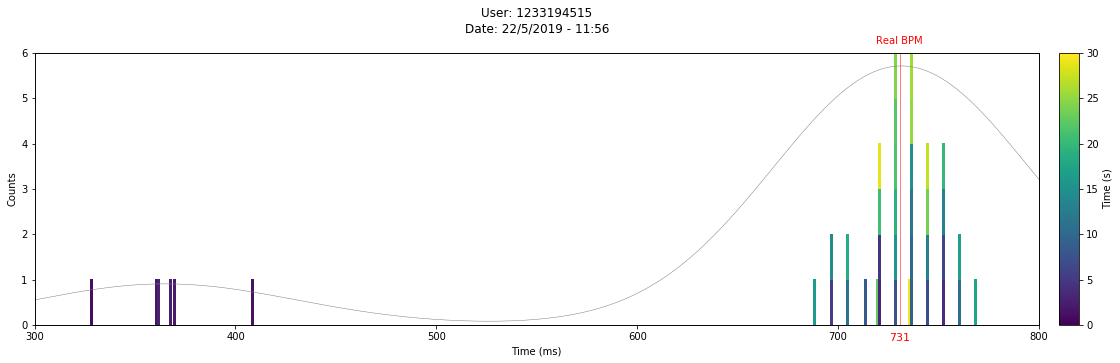

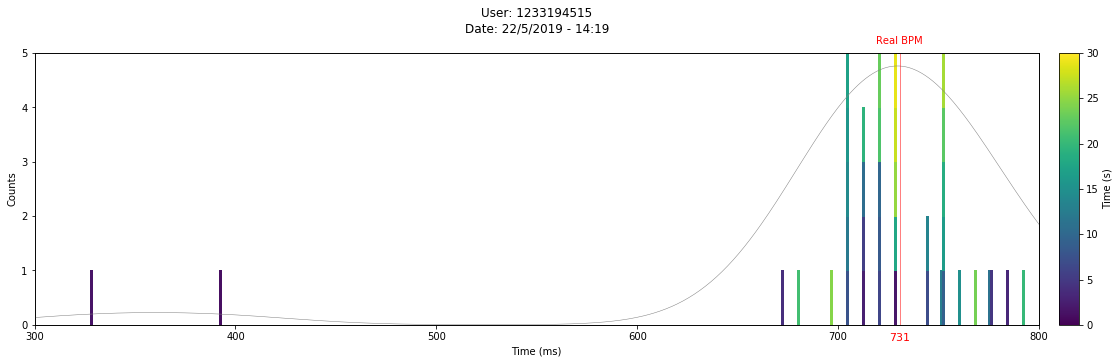

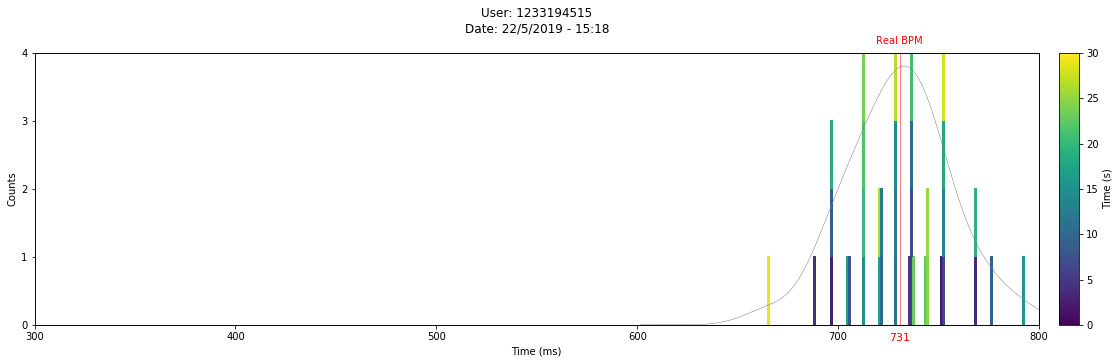

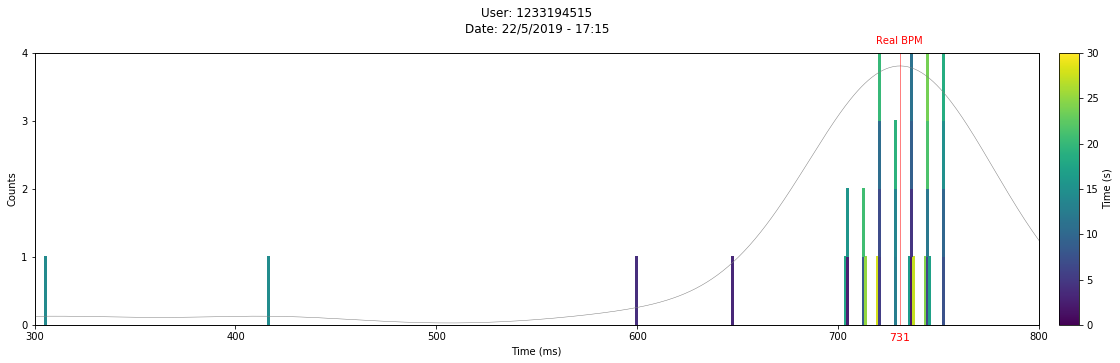

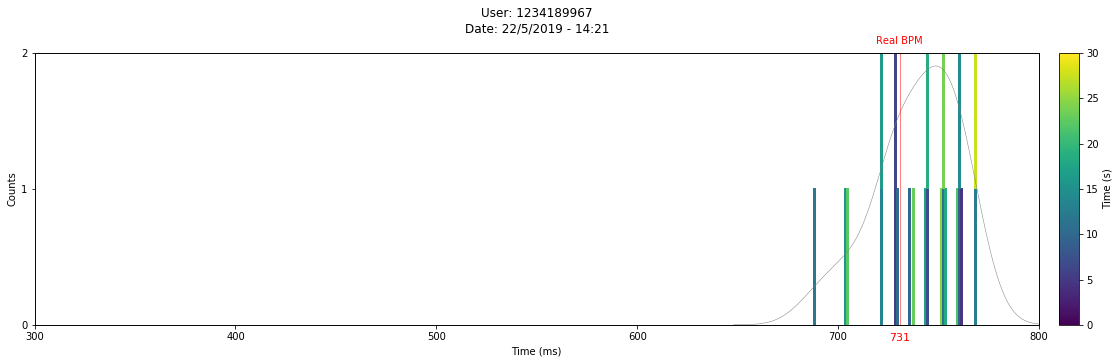

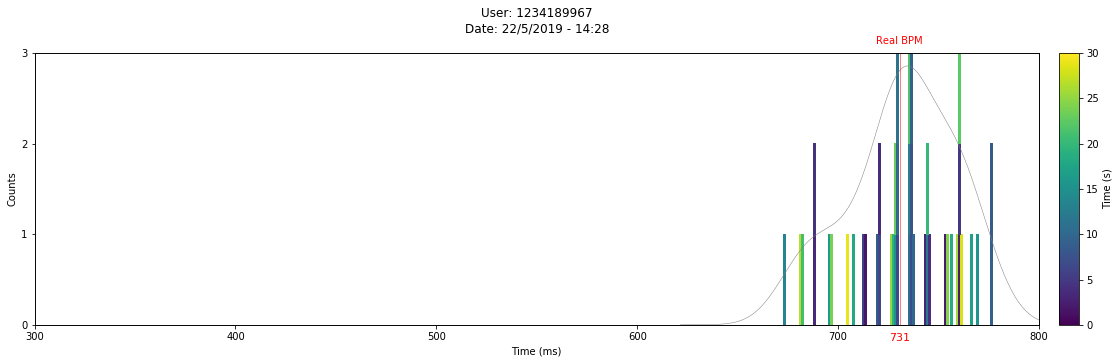

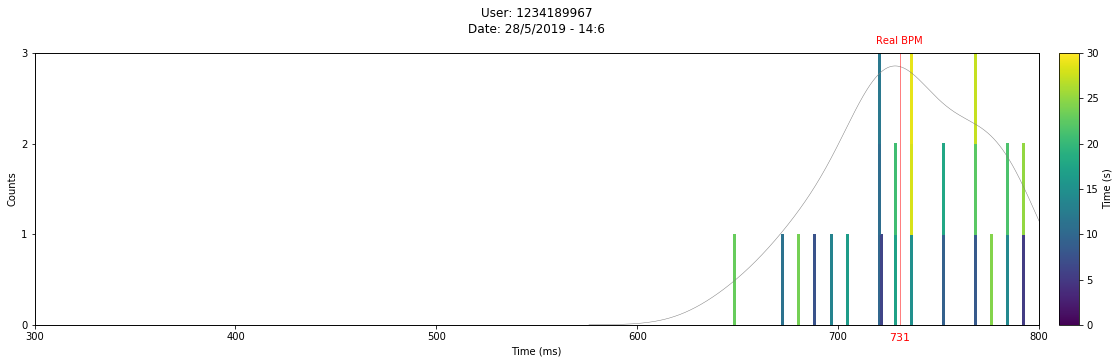

In [20]:
direc = "Data/Individual/"
direc_counts = "Data/Individual_Counts/"
for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    #print(data)
    data_counts = pd.read_csv(os.path.join(direc_counts, file))
    #print(data_counts)
    list_counts = []
    for index, row in data_counts.iterrows():
        #print(row)
        act_x = row[1]
        while act_x > 0:
            list_counts.append(int(row[0]))
            act_x = act_x - 1

    df = pd.DataFrame(list_counts)
    
    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
  

    x = list(data_cop.columns)
    y = list(data_cop.index)
    z = np.asmatrix(data_cop.values)

    fig, ax1 = plt.subplots(1,1, figsize = (18,5))

    c = ax1.pcolor(x, y, np.array(z), cmap="viridis", vmin=0, vmax=30)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
   
    
    ax2 = ax1.twinx()
    
    df.plot(kind='kde', ax= ax2, secondary_y=False , color = "grey", linewidth=0.5)
    
    
   
    ax1.set_xlim(right=800, left=300)
    
    ax2.set_ylim(bottom=0)
    ax2.get_legend().remove()
    
    
    ax2.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=10)
    
    ax2.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=11)
    
    
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Counts')
    
    plt.yticks([])
    plt.ylabel("")
    data_aux = file.split(".")
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
    date_aux = data_aux[1].split("-")
    plt.title("User: "+data_aux[0]+"\n"+"Date: "+date_aux[0]+"/"+date_aux[1]+"/2019 - "+date_aux[2][1:]+":"+date_aux[3]+"\n")
    
    plt.axvline(x=731,color='red', linewidth=0.5)
    
    
    axins = inset_axes(ax1,
                   width="2%",  
                   height="100%",  
                   loc='lower left',
                   bbox_to_anchor=(1.02, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
    
    cb = fig.colorbar(c, ax=ax1, cax = axins)
    cb.set_label('Time (s)')
    plt.show()
    

## Heatmap + KDE plot, global users delay

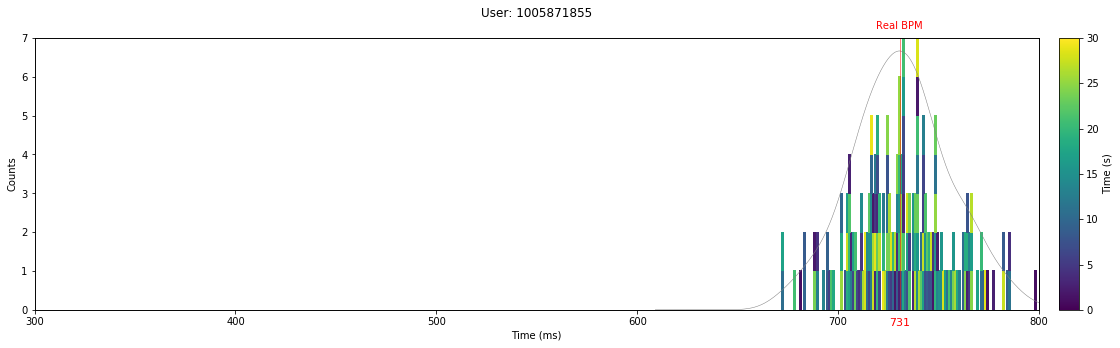

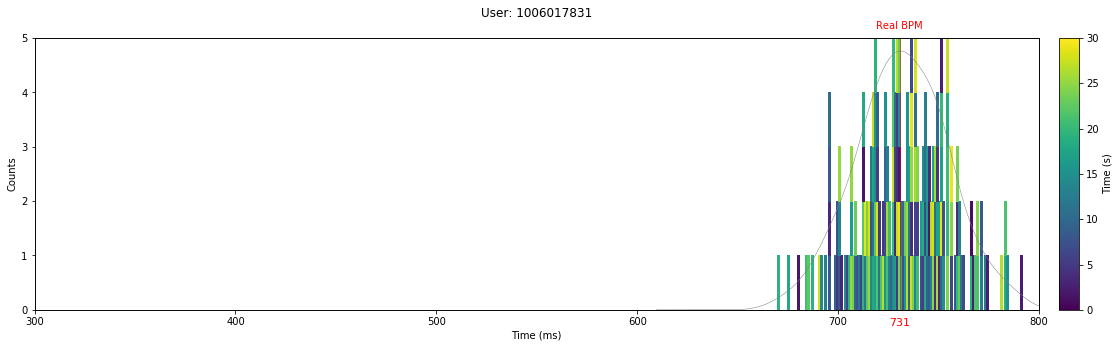

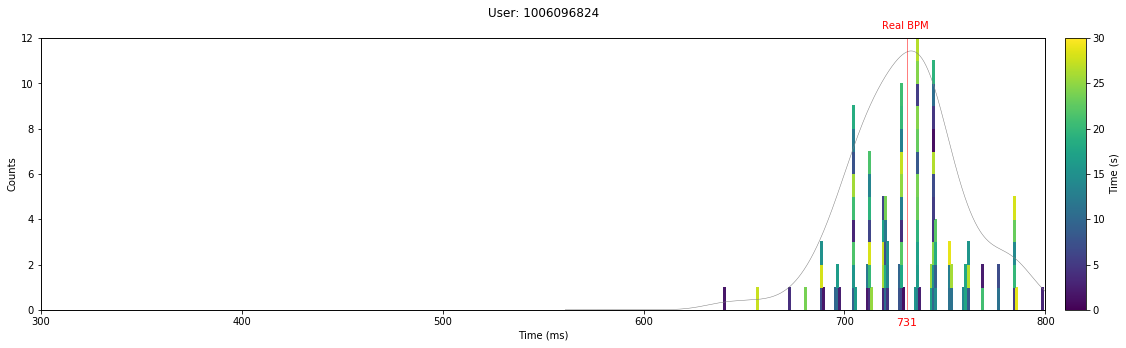

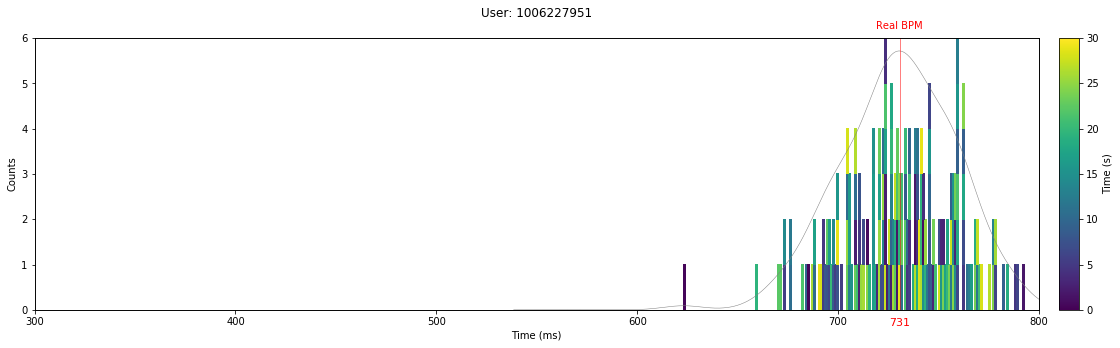

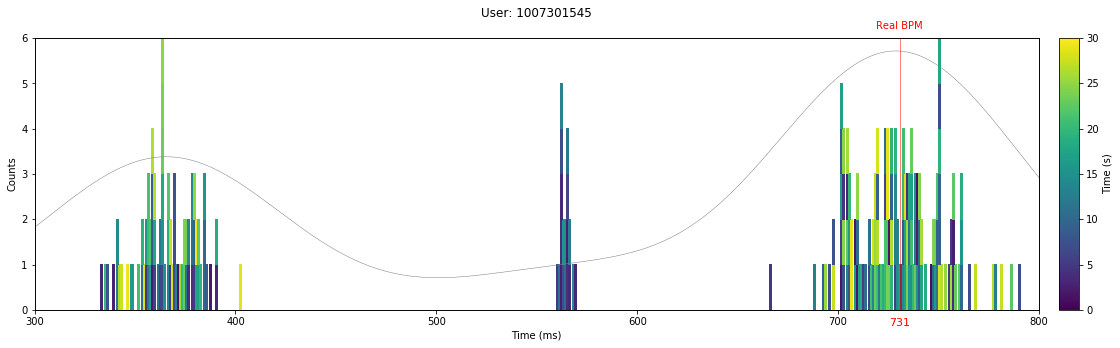

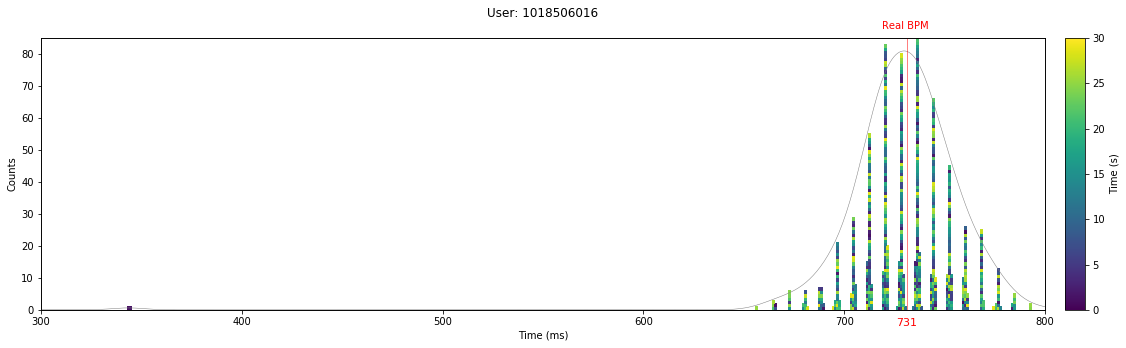

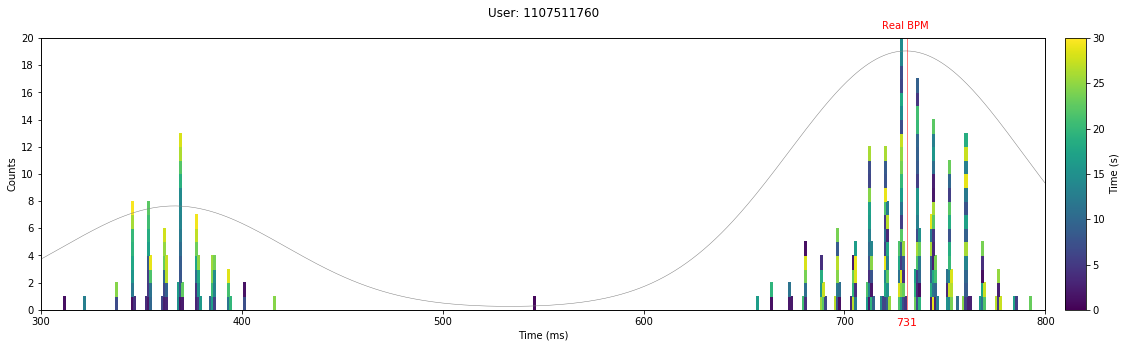

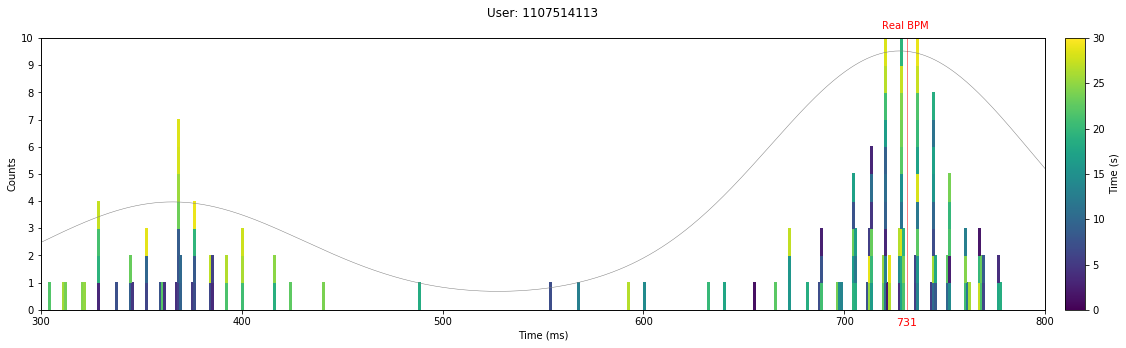

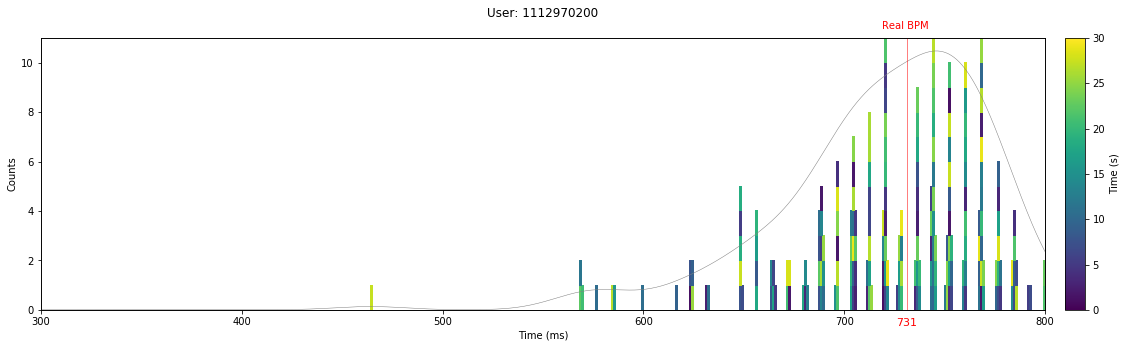

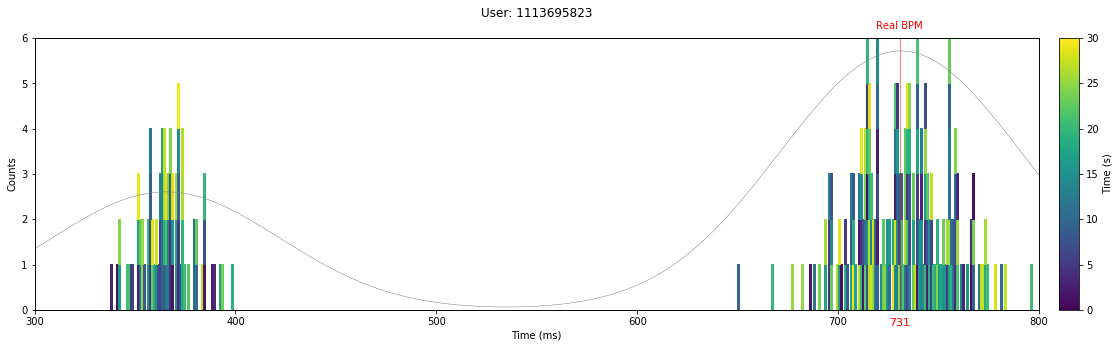

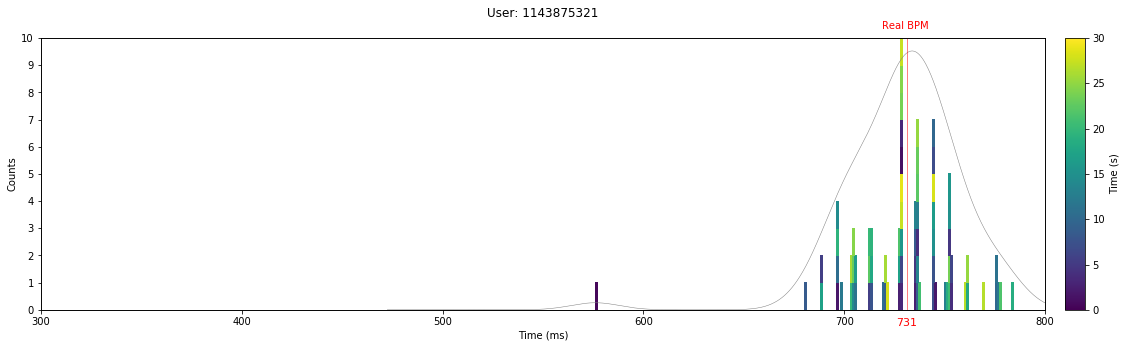

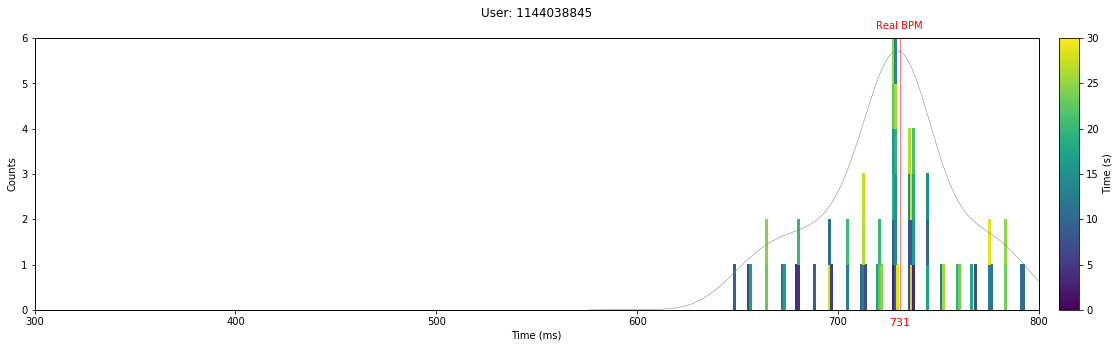

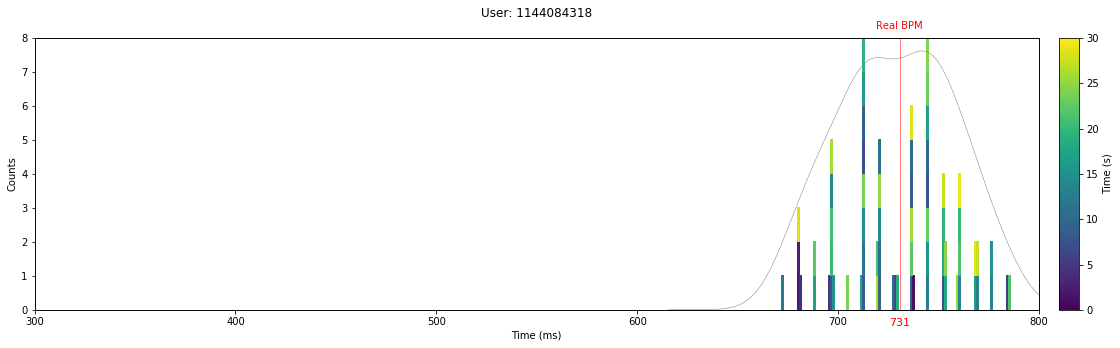

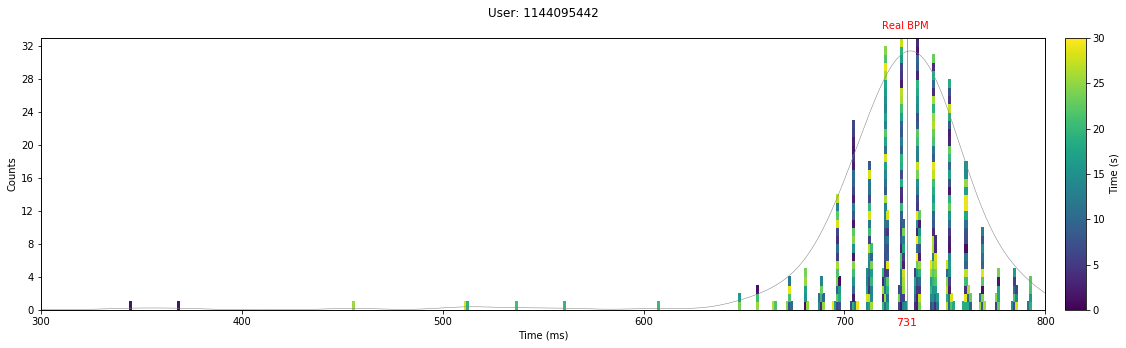

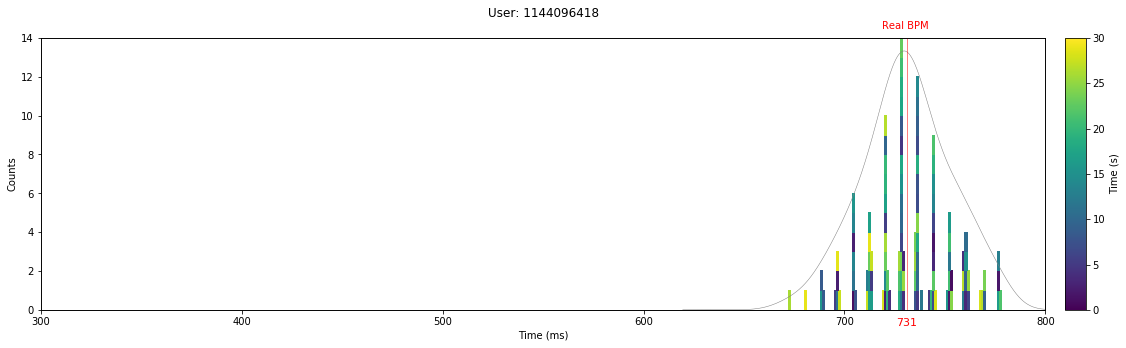

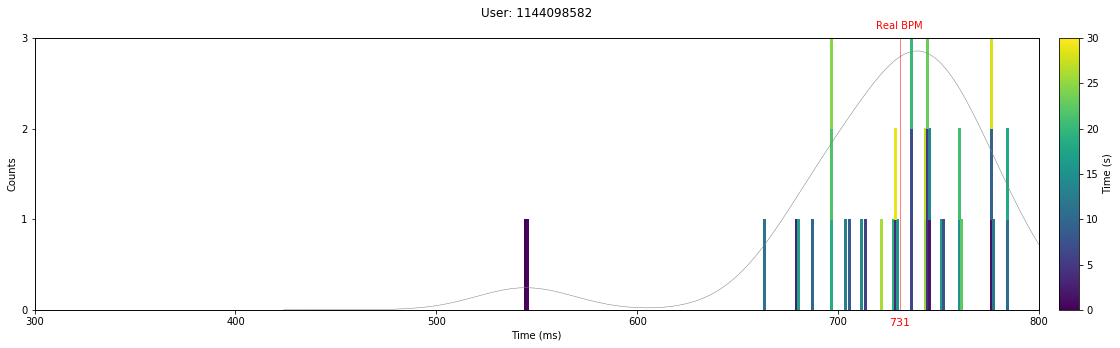

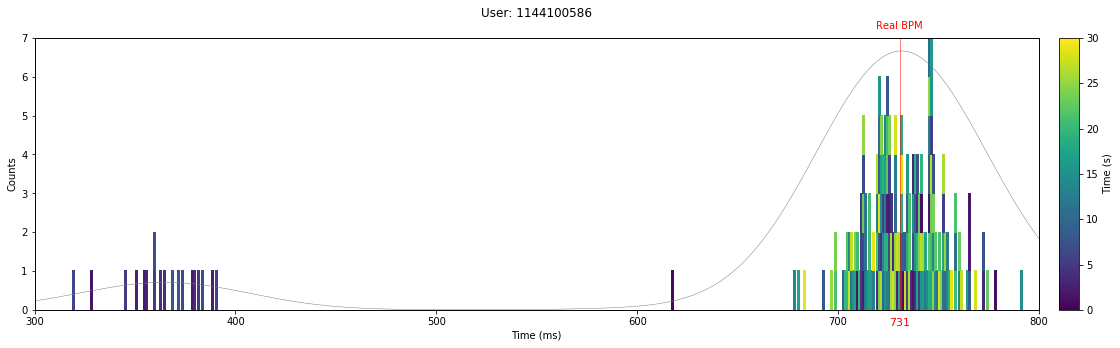

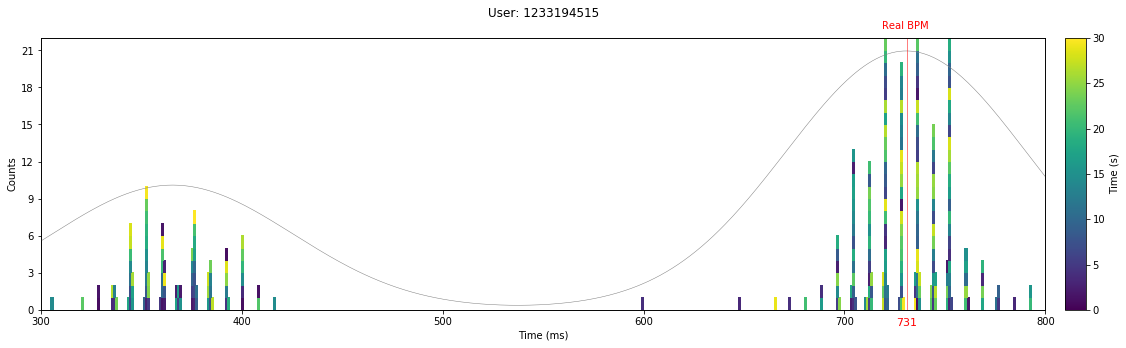

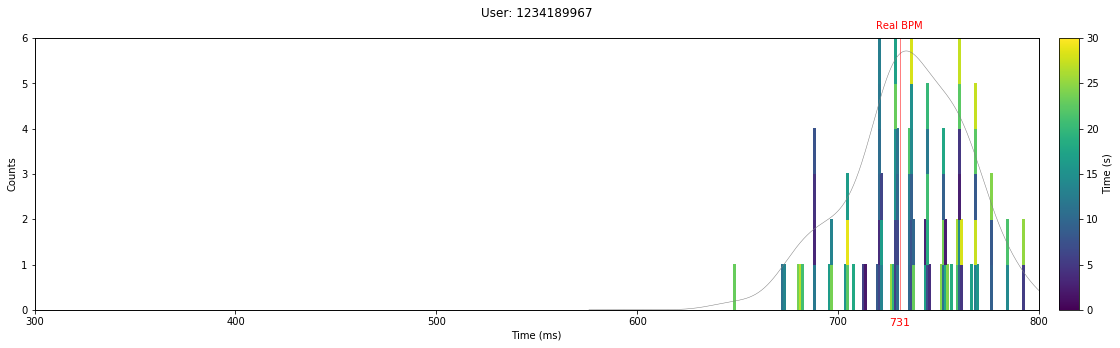

In [18]:
direc = "Data/Global/"
direc_counts = "Data/Global_Counts/"
difference_dict = {}
for file in os.listdir(direc):
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    data_counts = pd.read_csv(os.path.join(direc_counts, file))
    
    list_counts = []
    for index, row in data_counts.iterrows():

        act_x = row[1]
        while act_x > 0:
            list_counts.append(int(row[0]))
            act_x = act_x - 1

    df = pd.DataFrame(list_counts)
    
    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
       
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
  

    x = list(data_cop.columns)
    y = list(data_cop.index)
    z = np.asmatrix(data_cop.values)

    
    fig, ax1 = plt.subplots(1,1, figsize = (18,5))

    c = ax1.pcolor(x, y, np.array(z), cmap="viridis", vmin=0, vmax=30)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax2 = ax1.twinx()
    kde = df.plot(kind='kde', ax= ax2, secondary_y=False , color = "grey", linewidth=0.5)
    
    array_kde_y = kde.get_children()[0]._y
    array_kde_x = kde.get_children()[0]._x
    
    max_inx = np.argmax(array_kde_y)
    max_kde_value_y = array_kde_y[max_inx]
    max_kde_value_x = array_kde_x[max_inx]
    difference_dict[data_aux[0]] = max_kde_value_x
    
    ax1.set_xlim(right=800, left=300)
    
    ax2.set_ylim(bottom=0)
    ax2.get_legend().remove()
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
    
    
    ax2.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=10)
    
    ax2.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=11)
    
    
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Counts')
    
    plt.yticks([])
    plt.ylabel("")
    plt.title("User: "+data_aux[0]+"\n")
    plt.axvline(x=731,color='red', linewidth=0.5)
    
    
    axins = inset_axes(ax1,
                   width="2%", 
                   height="100%", 
                   loc='lower left',
                   bbox_to_anchor=(1.02, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
    
    cb = fig.colorbar(c, ax=ax1, cax = axins)
    cb.set_label('Time (s)')
    plt.show()
    

Calculate the difference between ideal (731) and the max value and write a file

In [21]:
for user in difference_dict.keys():
    act = difference_dict[user]
    difference_dict[user] = abs(act-731)

In [22]:
f = open("difference.txt", "w")
msg="User,Difference\n"
for user in difference_dict.keys():
    msg += user + "," + str(difference_dict[user]) + "\n"
f.write(msg)
f.close()

In [ ]:
print(msg)

## Heatmap for Individual users, all delays.

In [ ]:
direc = "Data/Individual/"

for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))

    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
            
            
    num_ticks = 6
    xticks = np.linspace(0, len(data_cop.keys())-1, num_ticks, dtype=np.int)
    xtickslabels = [data_cop.keys()[idx] for idx in xticks]
    
    plt.figure(figsize = (18,5)) 
    ax = plt.axes()
    sns.heatmap(data_cop, linewidths=.1 , cmap="viridis", vmin=0, vmax=30, ax=ax, xticklabels=xtickslabels, yticklabels=False)
    ax.invert_yaxis()
    ax.vlines([line+1], *ax.get_ylim(), color ="r", Label="731", linewidth=0.5, linestyles= 'solid')
    ax.set_xticks(xticks)
    ax.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=10)
    ax.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=11)
    data_aux = file.split(".")
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
    date_aux = data_aux[1].split("-")
    plt.title("User: "+data_aux[0]+"\n"+"Date: "+date_aux[0]+"/"+date_aux[1]+"/2019 - "+date_aux[2][1:]+":"+date_aux[3]+"\n")
    plt.xlabel("time (ms)")
    plt.xticks( rotation='horizontal')
    plt.show()

## Heatmap that contains all the delays from one user.

In [ ]:
direc = "Data/Global/"

for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    
    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
            
            
    
    num_ticks = 6
    xticks = np.linspace(0, len(data_cop.keys())-1, num_ticks, dtype=np.int)
    xtickslabels = [data_cop.keys()[idx] for idx in xticks]
    
    plt.figure(figsize = (18,5)) 
    ax = plt.axes()
    sns.heatmap(data_cop, linewidths=.1 , cmap="viridis", vmin=0, vmax=30, ax=ax, xticklabels=xtickslabels, yticklabels=False)
    ax.invert_yaxis()
    ax.vlines([line+1], *ax.get_ylim(), color ="r", Label="731", linewidth=0.5, linestyles= 'solid')
    ax.set_xticks(xticks)
    ax.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=10)
    ax.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                    xytext=(0,-5), textcoords="offset points",
                    ha="right", va="top", color = 'Red', fontsize=11)
    data_aux = file.split(".")
    data_aux = data_aux[0].split("_")
    plt.title("User: "+data_aux[0]+"\n")
    plt.xlabel("time (ms)")
    plt.xticks( rotation='horizontal')
    plt.show()